# Test Rolling Horizon

In [54]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
import gurobipy
import cartopy.crs as ccrs
from pypsa.optimization import optimize
import matplotlib.cm as cm
import numpy as np

pd.set_option("display.max_rows", None)  # Display all rows
pd.set_option("display.max_columns", None)  # Display all columns


In [55]:
n = pypsa.Network("C:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\Model_IT\\20240319_IT3zeroem\\elec_s_3_ec_lv1.5_Co2L0.0-3h.nc")


INFO:pypsa.io:Imported network elec_s_3_ec_lv1.5_Co2L0.0-3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [56]:
n.global_constraints.loc['CO2Limit','constant']=90000000

In [57]:
# set marginal cost of load shedding to 3000€/MWh
for bus in n.generators.bus:
    for index in n.generators.index:
        if not bus.endswith('H2') and index.endswith('load'):
            n.generators.loc[index, 'marginal_cost'] = 3000

#edit load shedding's unit from kW to MW
for index in n.generators.index:
    if index.endswith('load') and not index.endswith('H2 load'):
        n.generators.loc[index, 'sign'] = 1

In [58]:
n.optimize(solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 15/15 [00:01<00:00, 14.59it/s]
INFO:linopy.io: Writing time: 7.06s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5q747jly.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5q747jly.lp


Reading time = 2.24 seconds


INFO:gurobipy:Reading time = 2.24 seconds


obj: 531483 rows, 256950 columns, 997219 nonzeros


INFO:gurobipy:obj: 531483 rows, 256950 columns, 997219 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 531483 rows, 256950 columns and 997219 nonzeros


INFO:gurobipy:Optimize a model with 531483 rows, 256950 columns and 997219 nonzeros


Model fingerprint: 0xf08624b2


INFO:gurobipy:Model fingerprint: 0xf08624b2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+00, 2e+09]


INFO:gurobipy:  Bounds range     [4e+00, 2e+09]


  RHS range        [3e+00, 1e+09]


INFO:gurobipy:  RHS range        [3e+00, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 389859 rows and 62818 columns


INFO:gurobipy:Presolve removed 389859 rows and 62818 columns


Presolve time: 0.88s


INFO:gurobipy:Presolve time: 0.88s


Presolved: 141624 rows, 194132 columns, 515343 nonzeros


INFO:gurobipy:Presolved: 141624 rows, 194132 columns, 515343 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.21s


INFO:gurobipy:Ordering time: 0.21s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 28


INFO:gurobipy: Dense cols : 28


 AA' NZ     : 3.592e+05


INFO:gurobipy: AA' NZ     : 3.592e+05


 Factor NZ  : 2.298e+06 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 2.298e+06 (roughly 150 MB of memory)


 Factor Ops : 6.682e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.682e+07 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.90888335e+19 -9.63530251e+19  2.78e+13 2.09e+06  4.04e+15     2s


INFO:gurobipy:   0   2.90888335e+19 -9.63530251e+19  2.78e+13 2.09e+06  4.04e+15     2s


   1   2.06001026e+19 -3.13955439e+19  2.09e+13 5.65e+05  2.18e+15     2s


INFO:gurobipy:   1   2.06001026e+19 -3.13955439e+19  2.09e+13 5.65e+05  2.18e+15     2s


   2   1.63163764e+19 -1.47142423e+19  1.66e+13 1.28e+05  1.55e+15     2s


INFO:gurobipy:   2   1.63163764e+19 -1.47142423e+19  1.66e+13 1.28e+05  1.55e+15     2s


   3   2.91770812e+18 -3.71397866e+18  2.86e+12 1.36e+04  2.69e+14     3s


INFO:gurobipy:   3   2.91770812e+18 -3.71397866e+18  2.86e+12 1.36e+04  2.69e+14     3s


   4   2.83282620e+17 -4.29251526e+17  2.26e+11 7.45e+02  2.16e+13     4s


INFO:gurobipy:   4   2.83282620e+17 -4.29251526e+17  2.26e+11 7.45e+02  2.16e+13     4s


   5   4.79124319e+16 -9.47439541e+16  4.06e+08 6.55e+01  4.20e+11     4s


INFO:gurobipy:   5   4.79124319e+16 -9.47439541e+16  4.06e+08 6.55e+01  4.20e+11     4s


   6   1.75220734e+16 -1.27945074e+16  8.92e+07 1.00e+01  8.42e+10     4s


INFO:gurobipy:   6   1.75220734e+16 -1.27945074e+16  8.92e+07 1.00e+01  8.42e+10     4s


   7   1.56955077e+16 -2.48572185e+15  7.96e+07 1.63e+00  4.87e+10     4s


INFO:gurobipy:   7   1.56955077e+16 -2.48572185e+15  7.96e+07 1.63e+00  4.87e+10     4s


   8   7.46787042e+14 -5.86415289e+14  2.35e+06 1.66e-01  3.36e+09     5s


INFO:gurobipy:   8   7.46787042e+14 -5.86415289e+14  2.35e+06 1.66e-01  3.36e+09     5s


   9   5.41234315e+12 -5.70551889e+13  1.99e+00 1.31e-02  1.53e+08     5s


INFO:gurobipy:   9   5.41234315e+12 -5.70551889e+13  1.99e+00 1.31e-02  1.53e+08     5s


  10   1.48035818e+12 -7.20171731e+12  3.74e-01 1.55e-03  2.11e+07     5s


INFO:gurobipy:  10   1.48035818e+12 -7.20171731e+12  3.74e-01 1.55e-03  2.11e+07     5s


  11   5.68372262e+11 -2.77254246e+12  1.07e-01 6.03e-04  8.09e+06     6s


INFO:gurobipy:  11   5.68372262e+11 -2.77254246e+12  1.07e-01 6.03e-04  8.09e+06     6s


  12   3.32556679e+11 -1.15009111e+12  4.97e-02 2.60e-04  3.59e+06     6s


INFO:gurobipy:  12   3.32556679e+11 -1.15009111e+12  4.97e-02 2.60e-04  3.59e+06     6s


  13   2.21088570e+11 -6.07766905e+11  2.73e-02 1.36e-04  2.01e+06     6s


INFO:gurobipy:  13   2.21088570e+11 -6.07766905e+11  2.73e-02 1.36e-04  2.01e+06     6s


  14   9.76181057e+10 -1.48103874e+11  9.19e-03 3.17e-05  5.95e+05     7s


INFO:gurobipy:  14   9.76181057e+10 -1.48103874e+11  9.19e-03 3.17e-05  5.95e+05     7s


  15   6.56322049e+10 -7.35037567e+10  5.49e-03 1.68e-05  3.37e+05     7s


INFO:gurobipy:  15   6.56322049e+10 -7.35037567e+10  5.49e-03 1.68e-05  3.37e+05     7s


  16   3.30894851e+10 -5.27940990e+10  1.58e-03 1.25e-05  2.08e+05     7s


INFO:gurobipy:  16   3.30894851e+10 -5.27940990e+10  1.58e-03 1.25e-05  2.08e+05     7s


  17   2.29588051e+10 -1.67378326e+10  6.06e-04 5.59e-06  9.61e+04     8s


INFO:gurobipy:  17   2.29588051e+10 -1.67378326e+10  6.06e-04 5.59e-06  9.61e+04     8s


  18   1.86559017e+10 -3.21782226e+09  3.08e-04 2.98e-06  5.29e+04     8s


INFO:gurobipy:  18   1.86559017e+10 -3.21782226e+09  3.08e-04 2.98e-06  5.29e+04     8s


  19   1.67683288e+10 -3.06905191e+09  2.05e-04 2.93e-06  4.80e+04     8s


INFO:gurobipy:  19   1.67683288e+10 -3.06905191e+09  2.05e-04 2.93e-06  4.80e+04     8s


  20   1.52336076e+10  4.22048188e+09  1.25e-04 1.55e-06  2.67e+04     8s


INFO:gurobipy:  20   1.52336076e+10  4.22048188e+09  1.25e-04 1.55e-06  2.67e+04     8s


  21   1.42993346e+10  7.38861653e+09  8.12e-05 9.37e-07  1.67e+04     9s


INFO:gurobipy:  21   1.42993346e+10  7.38861653e+09  8.12e-05 9.37e-07  1.67e+04     9s


  22   1.38434865e+10  8.79758196e+09  6.06e-05 6.66e-07  1.22e+04     9s


INFO:gurobipy:  22   1.38434865e+10  8.79758196e+09  6.06e-05 6.66e-07  1.22e+04     9s


  23   1.34041708e+10  9.89693523e+09  4.26e-05 4.52e-07  8.49e+03     9s


INFO:gurobipy:  23   1.34041708e+10  9.89693523e+09  4.26e-05 4.52e-07  8.49e+03     9s


  24   1.30977241e+10  1.08301968e+10  3.06e-05 2.73e-07  5.49e+03    10s


INFO:gurobipy:  24   1.30977241e+10  1.08301968e+10  3.06e-05 2.73e-07  5.49e+03    10s


  25   1.27502660e+10  1.13203869e+10  1.77e-05 1.77e-07  3.46e+03    10s


INFO:gurobipy:  25   1.27502660e+10  1.13203869e+10  1.77e-05 1.77e-07  3.46e+03    10s


  26   1.26778335e+10  1.18052156e+10  1.50e-05 8.30e-08  2.11e+03    11s


INFO:gurobipy:  26   1.26778335e+10  1.18052156e+10  1.50e-05 8.30e-08  2.11e+03    11s


  27   1.24768590e+10  1.19827311e+10  7.99e-06 4.94e-08  1.20e+03    11s


INFO:gurobipy:  27   1.24768590e+10  1.19827311e+10  7.99e-06 4.94e-08  1.20e+03    11s


  28   1.24176136e+10  1.20274720e+10  5.94e-06 4.08e-08  9.44e+02    11s


INFO:gurobipy:  28   1.24176136e+10  1.20274720e+10  5.94e-06 4.08e-08  9.44e+02    11s


  29   1.23707266e+10  1.21075416e+10  4.35e-06 2.48e-08  6.37e+02    11s


INFO:gurobipy:  29   1.23707266e+10  1.21075416e+10  4.35e-06 2.48e-08  6.37e+02    11s


  30   1.23369807e+10  1.21320669e+10  3.26e-06 2.00e-08  4.96e+02    11s


INFO:gurobipy:  30   1.23369807e+10  1.21320669e+10  3.26e-06 2.00e-08  4.96e+02    11s


  31   1.23211252e+10  1.21528862e+10  2.74e-06 1.59e-08  4.07e+02    12s


INFO:gurobipy:  31   1.23211252e+10  1.21528862e+10  2.74e-06 1.59e-08  4.07e+02    12s


  32   1.22907316e+10  1.21943029e+10  1.74e-06 8.02e-09  2.33e+02    12s


INFO:gurobipy:  32   1.22907316e+10  1.21943029e+10  1.74e-06 8.02e-09  2.33e+02    12s


  33   1.22728490e+10  1.22035823e+10  1.28e-06 6.16e-09  1.68e+02    12s


INFO:gurobipy:  33   1.22728490e+10  1.22035823e+10  1.28e-06 6.16e-09  1.68e+02    12s


  34   1.22604263e+10  1.22203176e+10  9.91e-07 2.81e-09  9.71e+01    13s


INFO:gurobipy:  34   1.22604263e+10  1.22203176e+10  9.91e-07 2.81e-09  9.71e+01    13s


  35   1.22501863e+10  1.22235012e+10  5.85e-07 2.17e-09  6.46e+01    13s


INFO:gurobipy:  35   1.22501863e+10  1.22235012e+10  5.85e-07 2.17e-09  6.46e+01    13s


  36   1.22449257e+10  1.22279164e+10  5.34e-07 1.32e-09  4.12e+01    13s


INFO:gurobipy:  36   1.22449257e+10  1.22279164e+10  5.34e-07 1.32e-09  4.12e+01    13s


  37   1.22435080e+10  1.22286593e+10  3.60e-07 1.19e-09  3.59e+01    13s


INFO:gurobipy:  37   1.22435080e+10  1.22286593e+10  3.60e-07 1.19e-09  3.59e+01    13s


  38   1.22409953e+10  1.22312371e+10  3.64e-07 9.70e-10  2.36e+01    14s


INFO:gurobipy:  38   1.22409953e+10  1.22312371e+10  3.64e-07 9.70e-10  2.36e+01    14s


  39   1.22391714e+10  1.22327365e+10  5.01e-07 8.54e-10  1.56e+01    14s


INFO:gurobipy:  39   1.22391714e+10  1.22327365e+10  5.01e-07 8.54e-10  1.56e+01    14s


  40   1.22375615e+10  1.22330420e+10  1.88e-06 1.03e-09  1.09e+01    14s


INFO:gurobipy:  40   1.22375615e+10  1.22330420e+10  1.88e-06 1.03e-09  1.09e+01    14s


  41   1.22370727e+10  1.22340479e+10  1.07e-06 9.14e-10  7.32e+00    14s


INFO:gurobipy:  41   1.22370727e+10  1.22340479e+10  1.07e-06 9.14e-10  7.32e+00    14s


  42   1.22364081e+10  1.22342735e+10  4.81e-07 9.45e-10  5.17e+00    15s


INFO:gurobipy:  42   1.22364081e+10  1.22342735e+10  4.81e-07 9.45e-10  5.17e+00    15s


  43   1.22358542e+10  1.22346263e+10  5.91e-07 1.10e-09  2.97e+00    15s


INFO:gurobipy:  43   1.22358542e+10  1.22346263e+10  5.91e-07 1.10e-09  2.97e+00    15s


  44   1.22355423e+10  1.22346743e+10  6.69e-07 9.16e-10  2.10e+00    16s


INFO:gurobipy:  44   1.22355423e+10  1.22346743e+10  6.69e-07 9.16e-10  2.10e+00    16s


  45   1.22354056e+10  1.22348822e+10  3.89e-07 9.59e-10  1.27e+00    16s


INFO:gurobipy:  45   1.22354056e+10  1.22348822e+10  3.89e-07 9.59e-10  1.27e+00    16s


  46   1.22352715e+10  1.22349895e+10  1.10e-07 9.14e-10  6.83e-01    16s


INFO:gurobipy:  46   1.22352715e+10  1.22349895e+10  1.10e-07 9.14e-10  6.83e-01    16s


  47   1.22352279e+10  1.22351072e+10  3.32e-08 9.30e-10  2.92e-01    17s


INFO:gurobipy:  47   1.22352279e+10  1.22351072e+10  3.32e-08 9.30e-10  2.92e-01    17s


  48   1.22352191e+10  1.22351335e+10  2.19e-08 1.03e-09  2.07e-01    17s


INFO:gurobipy:  48   1.22352191e+10  1.22351335e+10  2.19e-08 1.03e-09  2.07e-01    17s


  49   1.22352089e+10  1.22351832e+10  8.37e-09 1.05e-09  6.23e-02    18s


INFO:gurobipy:  49   1.22352089e+10  1.22351832e+10  8.37e-09 1.05e-09  6.23e-02    18s


  50   1.22352046e+10  1.22351967e+10  2.83e-09 7.76e-10  1.91e-02    18s


INFO:gurobipy:  50   1.22352046e+10  1.22351967e+10  2.83e-09 7.76e-10  1.91e-02    18s


  51   1.22352025e+10  1.22352010e+10  7.89e-10 9.32e-10  3.61e-03    18s


INFO:gurobipy:  51   1.22352025e+10  1.22352010e+10  7.89e-10 9.32e-10  3.61e-03    18s


  52   1.22352021e+10  1.22352019e+10  2.07e-09 1.16e-09  4.65e-04    19s


INFO:gurobipy:  52   1.22352021e+10  1.22352019e+10  2.07e-09 1.16e-09  4.65e-04    19s


  53   1.22352020e+10  1.22352020e+10  2.16e-05 9.35e-10  6.57e-06    19s


INFO:gurobipy:  53   1.22352020e+10  1.22352020e+10  2.16e-05 9.35e-10  6.57e-06    19s


  54   1.22352020e+10  1.22352020e+10  2.45e-08 9.31e-10  1.31e-09    19s


INFO:gurobipy:  54   1.22352020e+10  1.22352020e+10  2.45e-08 9.31e-10  1.31e-09    19s


INFO:gurobipy:


Barrier solved model in 54 iterations and 19.49 seconds (4.80 work units)


INFO:gurobipy:Barrier solved model in 54 iterations and 19.49 seconds (4.80 work units)


Optimal objective 1.22352020e+10


INFO:gurobipy:Optimal objective 1.22352020e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   75432 variables added to crossover basis                       20s


INFO:gurobipy:   75432 variables added to crossover basis                       20s


INFO:gurobipy:


   65119 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   65119 DPushes remaining with DInf 0.0000000e+00                20s


    7931 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:    7931 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   12312 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:   12312 PPushes remaining with PInf 0.0000000e+00                27s


     694 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:     694 PPushes remaining with PInf 0.0000000e+00                30s


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 8.4276866e-10     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 8.4276866e-10     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Extra simplex iterations after uncrush: 1


INFO:gurobipy:Extra simplex iterations after uncrush: 1


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   49372    1.2235202e+10   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:   49372    1.2235202e+10   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:


Solved in 49372 iterations and 31.16 seconds (13.60 work units)


INFO:gurobipy:Solved in 49372 iterations and 31.16 seconds (13.60 work units)


Optimal objective  1.223520199e+10


INFO:gurobipy:Optimal objective  1.223520199e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 256950 primals, 531483 duals
Objective: 1.22e+10
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

('ok', 'optimal')

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


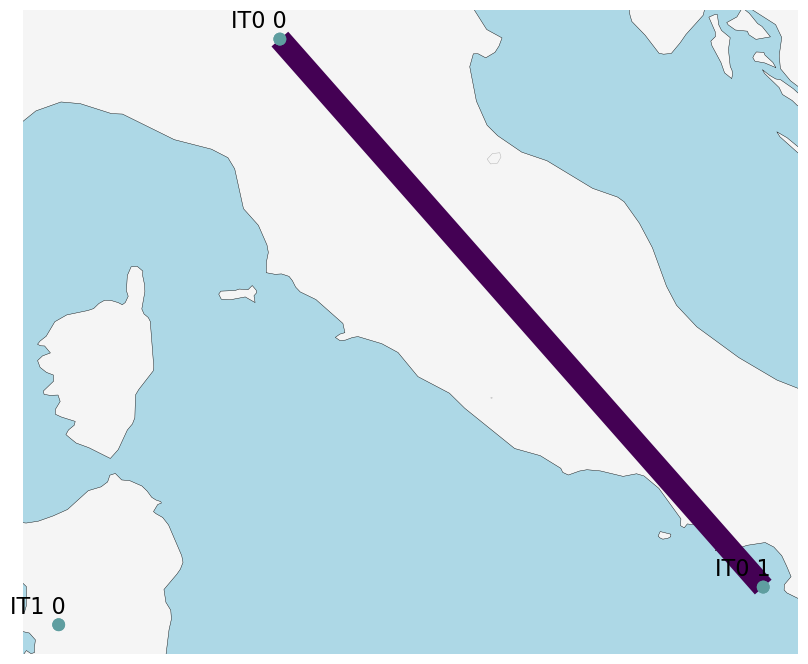

In [59]:
loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show

## Installed Capacity Plot

In [60]:
#color list for installed cap
tech_list = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
tech_list.remove('load')
color_cap = []

for i in range(len(tech_list)):
    for j in range(len(n.carriers.index)):
        if tech_list[i] == n.carriers.index[j]:
            color_cap.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  

cap = n.generators[n.generators['carrier']!='load'].groupby(['bus', 'carrier']).p_nom_opt.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_13740\3847545614.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_cap.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


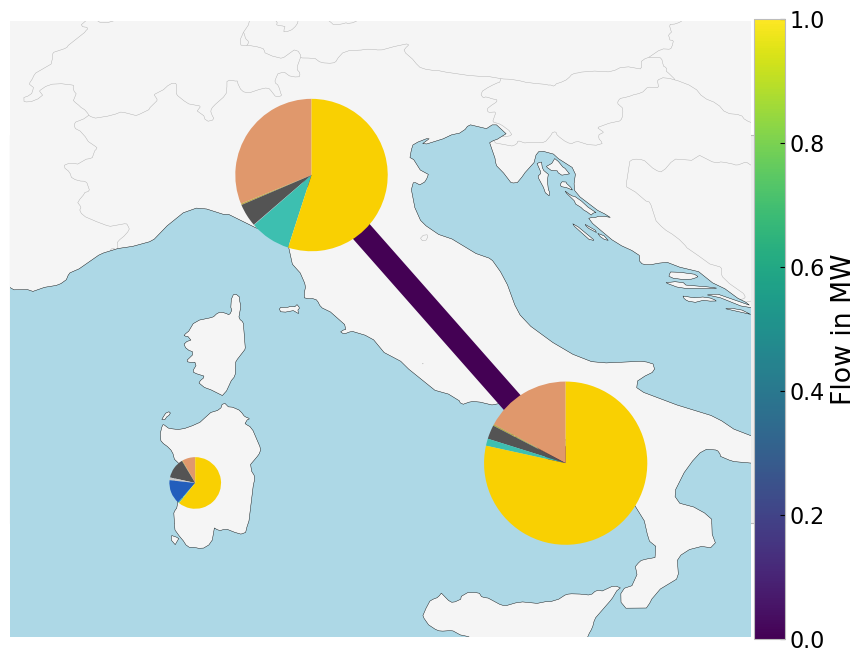

In [61]:
fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

collection = n.plot(
    bus_sizes=cap / 5e4,
    bus_colors = color_cap,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
        
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Generation Map Plot

In [62]:
#color list for energy generated 
tech_list_gen_table = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
colors_gen_table = []

for i in range(len(tech_list_gen_table)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen_table[i] == n.carriers.index[j]:
            colors_gen_table.append(n.carriers.color[j])
            break  # break the inner loop once a match is found 

#Adjust Load shedding's unit to MW from kW
#for column in n.generators_t.p.columns:
#    if column.endswith('load') and not column.endswith('H2 load'):
#        n.generators_t.p[column]/=1e3
        

gen = n.generators.assign(g=n.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_13740\971004373.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen_table.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


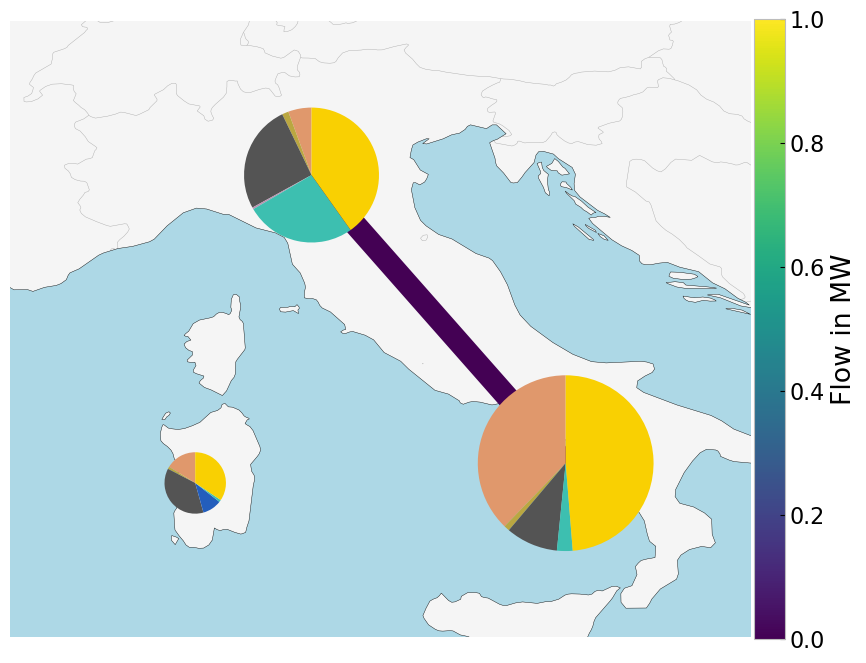

In [63]:
carriers = n.generators.carrier.unique()

plt.figure(figsize =(10,10))

collection = n.plot(
    bus_sizes=gen / 1e4,
    bus_colors = colors_gen_table,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Capacity Bar

<Figure size 640x480 with 0 Axes>

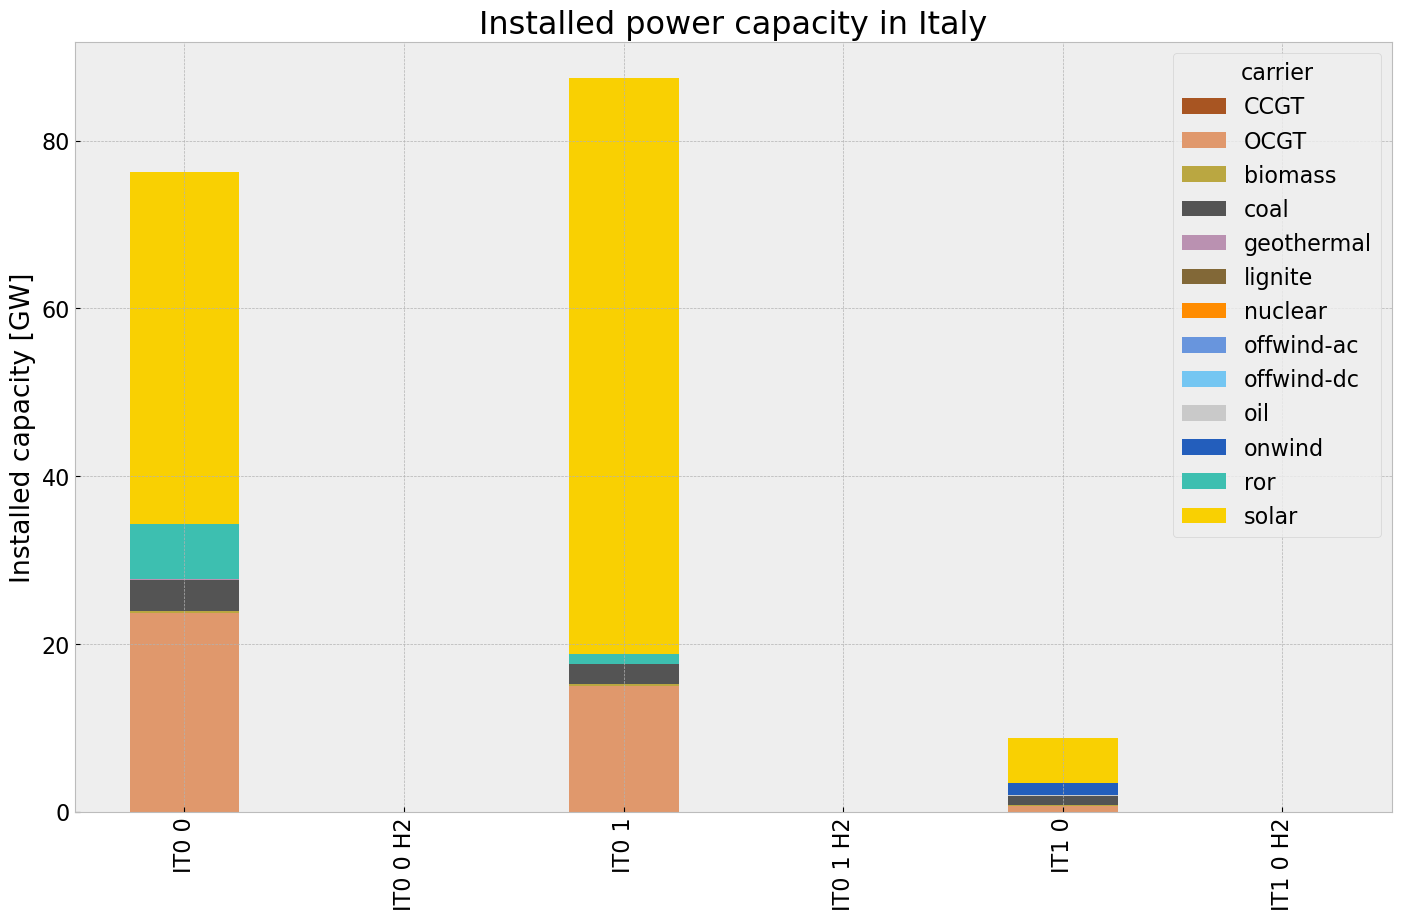

In [64]:
def inst_cap_table(n,colors):

    capacities = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
    capacities.fillna(0, inplace=True)
    gen = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)
    gen.fillna(0, inplace=True)

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    gen.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacity in Italy"
    )

    plt.show()
    return capacities
    
capacities_base = inst_cap_table(n, color_cap)

## Generation bar

<Figure size 640x480 with 0 Axes>

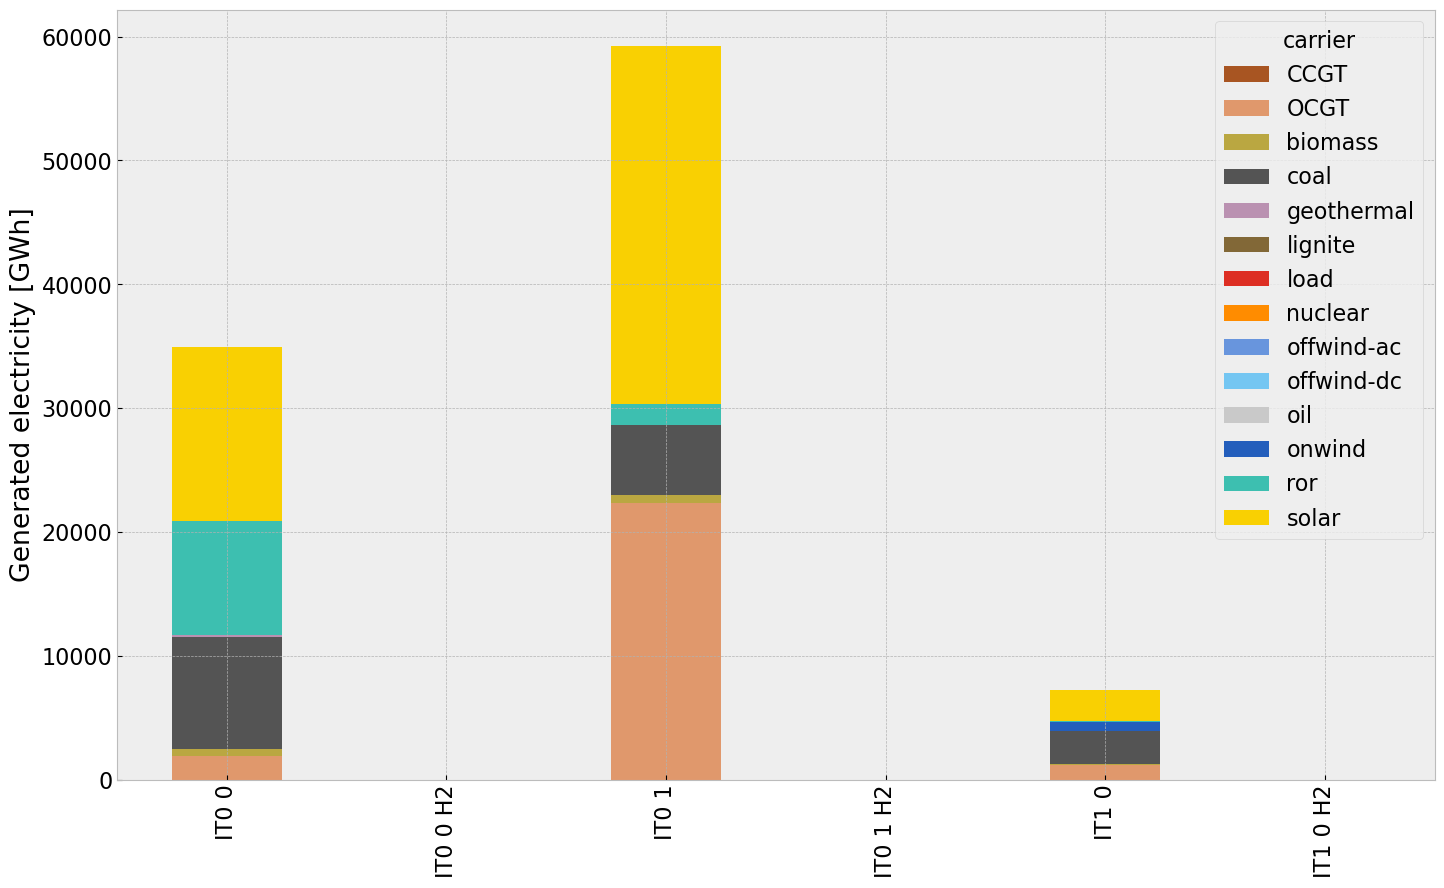

In [65]:
def gen_power_table(n, color):

    carrier = n.generators.carrier.unique()
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                    #print(generations.loc[r, tech])
                except KeyError:
                    print('error')
    generations.fillna(0, inplace=True)

    generations = (generations.unstack()/1000)#GWh
    #generations['load']/=1e3


    plt.figure()
    plt.rcParams.update({'font.size': 16})

    generations.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=color,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()
    return generations
    
gen_base = gen_power_table(n,colors_gen_table)

In [66]:
optimize.optimize_with_rolling_horizon(n, horizon=24, overlap=0,solver_name='gurobi')

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2013-01-01 00:00:00:2013-01-03 21:00:00] (1/122).
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2pbnch4g.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2pbnch4g.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8230 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8230 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8230 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8230 nonzeros


Model fingerprint: 0x4c2da26c


INFO:gurobipy:Model fingerprint: 0x4c2da26c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3254 rows and 526 columns


INFO:gurobipy:Presolve removed 3254 rows and 526 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1157 rows, 1615 columns, 4211 nonzeros


INFO:gurobipy:Presolved: 1157 rows, 1615 columns, 4211 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     937    1.1725772e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     937    1.1725772e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 937 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 937 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.172577181e+08


INFO:gurobipy:Optimal objective  1.172577181e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.17e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-z56ifldh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-z56ifldh.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8236 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8236 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8236 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8236 nonzeros


Model fingerprint: 0xb395fe7d


INFO:gurobipy:Model fingerprint: 0xb395fe7d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3248 rows and 520 columns


INFO:gurobipy:Presolve removed 3248 rows and 520 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1163 rows, 1621 columns, 4229 nonzeros


INFO:gurobipy:Presolved: 1163 rows, 1621 columns, 4229 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     883    1.1753796e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     883    1.1753796e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 883 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 883 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.175379635e+08


INFO:gurobipy:Optimal objective  1.175379635e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.18e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rb2yj9r_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rb2yj9r_.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8203 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8203 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8203 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8203 nonzeros


Model fingerprint: 0x6204d74c


INFO:gurobipy:Model fingerprint: 0x6204d74c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3281 rows and 553 columns


INFO:gurobipy:Presolve removed 3281 rows and 553 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1130 rows, 1588 columns, 4130 nonzeros


INFO:gurobipy:Presolved: 1130 rows, 1588 columns, 4130 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     889    1.5429051e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     889    1.5429051e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 889 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 889 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.542905148e+08


INFO:gurobipy:Optimal objective  1.542905148e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.54e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.5s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-mz_wd_y3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-mz_wd_y3.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8242 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8242 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8242 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8242 nonzeros


Model fingerprint: 0xc5346342


INFO:gurobipy:Model fingerprint: 0xc5346342


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3242 rows and 514 columns


INFO:gurobipy:Presolve removed 3242 rows and 514 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1169 rows, 1627 columns, 4247 nonzeros


INFO:gurobipy:Presolved: 1169 rows, 1627 columns, 4247 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     908    1.5059966e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     908    1.5059966e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 908 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 908 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.505996565e+08


INFO:gurobipy:Optimal objective  1.505996565e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.51e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-j2ut5691.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-j2ut5691.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8258 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8258 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


Model fingerprint: 0xe3b63298


INFO:gurobipy:Model fingerprint: 0xe3b63298


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3226 rows and 498 columns


INFO:gurobipy:Presolve removed 3226 rows and 498 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     918    1.4420442e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     918    1.4420442e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 918 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 918 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.442044172e+08


INFO:gurobipy:Optimal objective  1.442044172e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.44e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-za8n7z9p.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-za8n7z9p.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8259 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8259 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8259 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8259 nonzeros


Model fingerprint: 0x22c2928a


INFO:gurobipy:Model fingerprint: 0x22c2928a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3225 rows and 497 columns


INFO:gurobipy:Presolve removed 3225 rows and 497 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 1186 rows, 1644 columns, 4298 nonzeros


INFO:gurobipy:Presolved: 1186 rows, 1644 columns, 4298 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     903    1.6249595e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     903    1.6249595e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 903 iterations and 0.11 seconds (0.01 work units)


INFO:gurobipy:Solved in 903 iterations and 0.11 seconds (0.01 work units)


Optimal objective  1.624959541e+08


INFO:gurobipy:Optimal objective  1.624959541e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.62e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pr47mfqc.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pr47mfqc.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8256 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8256 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


Model fingerprint: 0x50679061


INFO:gurobipy:Model fingerprint: 0x50679061


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3228 rows and 500 columns


INFO:gurobipy:Presolve removed 3228 rows and 500 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     925    1.3283961e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     925    1.3283961e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 925 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 925 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.328396102e+08


INFO:gurobipy:Optimal objective  1.328396102e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.33e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u8s50gpz.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u8s50gpz.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8263 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


Model fingerprint: 0x2cf2f5ae


INFO:gurobipy:Model fingerprint: 0x2cf2f5ae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3221 rows and 493 columns


INFO:gurobipy:Presolve removed 3221 rows and 493 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     885    1.5745453e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     885    1.5745453e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 885 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 885 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.574545261e+08


INFO:gurobipy:Optimal objective  1.574545261e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.57e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-td8hbfbc.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-td8hbfbc.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8258 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8258 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


Model fingerprint: 0x5d3adf27


INFO:gurobipy:Model fingerprint: 0x5d3adf27


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3226 rows and 498 columns


INFO:gurobipy:Presolve removed 3226 rows and 498 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


    1029    1.3249082e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1029    1.3249082e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1029 iterations and 0.13 seconds (0.01 work units)


INFO:gurobipy:Solved in 1029 iterations and 0.13 seconds (0.01 work units)


Optimal objective  1.324908187e+08


INFO:gurobipy:Optimal objective  1.324908187e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.32e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-i79fl5qc.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-i79fl5qc.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8245 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8245 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8245 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8245 nonzeros


Model fingerprint: 0x694882f4


INFO:gurobipy:Model fingerprint: 0x694882f4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3239 rows and 511 columns


INFO:gurobipy:Presolve removed 3239 rows and 511 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1172 rows, 1630 columns, 4256 nonzeros


INFO:gurobipy:Presolved: 1172 rows, 1630 columns, 4256 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     791    1.6047100e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     791    1.6047100e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 791 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 791 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.604710036e+08


INFO:gurobipy:Optimal objective  1.604710036e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.60e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ozpyq58l.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ozpyq58l.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8258 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8258 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


Model fingerprint: 0x6cd4ce34


INFO:gurobipy:Model fingerprint: 0x6cd4ce34


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3226 rows and 498 columns


INFO:gurobipy:Presolve removed 3226 rows and 498 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


    1033    1.5016022e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1033    1.5016022e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1033 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 1033 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.501602232e+08


INFO:gurobipy:Optimal objective  1.501602232e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.50e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f79b9p2b.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f79b9p2b.lp


Reading time = 0.09 seconds


INFO:gurobipy:Reading time = 0.09 seconds


obj: 4411 rows, 2141 columns, 8263 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


Model fingerprint: 0x1c6cf73f


INFO:gurobipy:Model fingerprint: 0x1c6cf73f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3221 rows and 493 columns


INFO:gurobipy:Presolve removed 3221 rows and 493 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     859    1.4132832e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     859    1.4132832e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 859 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 859 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.413283173e+08


INFO:gurobipy:Optimal objective  1.413283173e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.41e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m3or6bzf.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m3or6bzf.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8263 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


Model fingerprint: 0xe660c920


INFO:gurobipy:Model fingerprint: 0xe660c920


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3221 rows and 493 columns


INFO:gurobipy:Presolve removed 3221 rows and 493 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     915    1.6038715e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     915    1.6038715e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 915 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 915 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.603871465e+08


INFO:gurobipy:Optimal objective  1.603871465e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.60e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4x0br6b6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4x0br6b6.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8256 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8256 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


Model fingerprint: 0x18c76fa6


INFO:gurobipy:Model fingerprint: 0x18c76fa6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3228 rows and 500 columns


INFO:gurobipy:Presolve removed 3228 rows and 500 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     895    1.3804476e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     895    1.3804476e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 895 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 895 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.380447571e+08


INFO:gurobipy:Optimal objective  1.380447571e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.38e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nz3nhkg7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nz3nhkg7.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8260 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8260 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


Model fingerprint: 0x85f0455f


INFO:gurobipy:Model fingerprint: 0x85f0455f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3224 rows and 496 columns


INFO:gurobipy:Presolve removed 3224 rows and 496 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     834    1.6284508e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     834    1.6284508e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 834 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 834 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.628450768e+08


INFO:gurobipy:Optimal objective  1.628450768e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.63e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4o9v0gno.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4o9v0gno.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 4411 rows, 2141 columns, 8233 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8233 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8233 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8233 nonzeros


Model fingerprint: 0x2b83ce5a


INFO:gurobipy:Model fingerprint: 0x2b83ce5a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3251 rows and 523 columns


INFO:gurobipy:Presolve removed 3251 rows and 523 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1160 rows, 1618 columns, 4220 nonzeros


INFO:gurobipy:Presolved: 1160 rows, 1618 columns, 4220 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     877    1.3494152e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     877    1.3494152e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 877 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 877 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.349415239e+08


INFO:gurobipy:Optimal objective  1.349415239e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.35e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.5s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wxsiifa7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wxsiifa7.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8245 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8245 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8245 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8245 nonzeros


Model fingerprint: 0xe4e5b312


INFO:gurobipy:Model fingerprint: 0xe4e5b312


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3239 rows and 511 columns


INFO:gurobipy:Presolve removed 3239 rows and 511 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1172 rows, 1630 columns, 4256 nonzeros


INFO:gurobipy:Presolved: 1172 rows, 1630 columns, 4256 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     931    1.5912072e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     931    1.5912072e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 931 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 931 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.591207202e+08


INFO:gurobipy:Optimal objective  1.591207202e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.59e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sbofxgif.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sbofxgif.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8260 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8260 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


Model fingerprint: 0x50fed348


INFO:gurobipy:Model fingerprint: 0x50fed348


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3224 rows and 496 columns


INFO:gurobipy:Presolve removed 3224 rows and 496 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     895    1.5346288e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     895    1.5346288e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 895 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 895 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.534628794e+08


INFO:gurobipy:Optimal objective  1.534628794e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.53e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bi2yal9h.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bi2yal9h.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8259 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8259 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8259 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8259 nonzeros


Model fingerprint: 0x2e0abd51


INFO:gurobipy:Model fingerprint: 0x2e0abd51


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3225 rows and 497 columns


INFO:gurobipy:Presolve removed 3225 rows and 497 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1186 rows, 1644 columns, 4298 nonzeros


INFO:gurobipy:Presolved: 1186 rows, 1644 columns, 4298 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     825    1.4435187e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     825    1.4435187e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 825 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 825 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.443518710e+08


INFO:gurobipy:Optimal objective  1.443518710e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.44e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ijnxqqni.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ijnxqqni.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8247 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8247 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8247 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8247 nonzeros


Model fingerprint: 0xa40c6db0


INFO:gurobipy:Model fingerprint: 0xa40c6db0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3237 rows and 509 columns


INFO:gurobipy:Presolve removed 3237 rows and 509 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1174 rows, 1632 columns, 4262 nonzeros


INFO:gurobipy:Presolved: 1174 rows, 1632 columns, 4262 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     895    1.5727072e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     895    1.5727072e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 895 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 895 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.572707233e+08


INFO:gurobipy:Optimal objective  1.572707233e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.57e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sa618nnk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sa618nnk.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8234 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8234 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8234 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8234 nonzeros


Model fingerprint: 0xd1ae1318


INFO:gurobipy:Model fingerprint: 0xd1ae1318


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3250 rows and 522 columns


INFO:gurobipy:Presolve removed 3250 rows and 522 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1161 rows, 1619 columns, 4223 nonzeros


INFO:gurobipy:Presolved: 1161 rows, 1619 columns, 4223 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     795    1.2880333e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     795    1.2880333e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 795 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 795 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.288033312e+08


INFO:gurobipy:Optimal objective  1.288033312e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.29e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qhokeqg2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qhokeqg2.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8262 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8262 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8262 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8262 nonzeros


Model fingerprint: 0xf6978352


INFO:gurobipy:Model fingerprint: 0xf6978352


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3222 rows and 494 columns


INFO:gurobipy:Presolve removed 3222 rows and 494 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1189 rows, 1647 columns, 4307 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 1647 columns, 4307 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


    1021    1.5380951e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1021    1.5380951e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1021 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 1021 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.538095064e+08


INFO:gurobipy:Optimal objective  1.538095064e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.54e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_ya858af.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_ya858af.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8262 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8262 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8262 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8262 nonzeros


Model fingerprint: 0x44ba1b54


INFO:gurobipy:Model fingerprint: 0x44ba1b54


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3222 rows and 494 columns


INFO:gurobipy:Presolve removed 3222 rows and 494 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1189 rows, 1647 columns, 4307 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 1647 columns, 4307 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     982    1.1913978e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     982    1.1913978e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 982 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 982 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.191397826e+08


INFO:gurobipy:Optimal objective  1.191397826e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.19e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1l80uue5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1l80uue5.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8243 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8243 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8243 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8243 nonzeros


Model fingerprint: 0x83811ea5


INFO:gurobipy:Model fingerprint: 0x83811ea5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3241 rows and 513 columns


INFO:gurobipy:Presolve removed 3241 rows and 513 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1170 rows, 1628 columns, 4250 nonzeros


INFO:gurobipy:Presolved: 1170 rows, 1628 columns, 4250 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     829    1.3605833e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     829    1.3605833e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 829 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 829 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.360583331e+08


INFO:gurobipy:Optimal objective  1.360583331e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.36e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-cb326svj.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-cb326svj.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 4411 rows, 2141 columns, 8261 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8261 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8261 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8261 nonzeros


Model fingerprint: 0x0f3f552f


INFO:gurobipy:Model fingerprint: 0x0f3f552f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3223 rows and 495 columns


INFO:gurobipy:Presolve removed 3223 rows and 495 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1188 rows, 1646 columns, 4304 nonzeros


INFO:gurobipy:Presolved: 1188 rows, 1646 columns, 4304 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     880    1.3237501e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     880    1.3237501e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 880 iterations and 0.12 seconds (0.01 work units)


INFO:gurobipy:Solved in 880 iterations and 0.12 seconds (0.01 work units)


Optimal objective  1.323750145e+08


INFO:gurobipy:Optimal objective  1.323750145e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.32e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r5lo51ka.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r5lo51ka.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8263 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


Model fingerprint: 0xfc8b1693


INFO:gurobipy:Model fingerprint: 0xfc8b1693


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3221 rows and 493 columns


INFO:gurobipy:Presolve removed 3221 rows and 493 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     813    1.2872953e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     813    1.2872953e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 813 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 813 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.287295350e+08


INFO:gurobipy:Optimal objective  1.287295350e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.29e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.57s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8ogkfay0.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8ogkfay0.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4411 rows, 2141 columns, 8255 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8255 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


Model fingerprint: 0x4188dbeb


INFO:gurobipy:Model fingerprint: 0x4188dbeb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3229 rows and 501 columns


INFO:gurobipy:Presolve removed 3229 rows and 501 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     962    1.4163272e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     962    1.4163272e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 962 iterations and 0.09 seconds (0.01 work units)


INFO:gurobipy:Solved in 962 iterations and 0.09 seconds (0.01 work units)


Optimal objective  1.416327181e+08


INFO:gurobipy:Optimal objective  1.416327181e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.42e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gp94bk_7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gp94bk_7.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8261 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8261 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8261 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8261 nonzeros


Model fingerprint: 0xd751576b


INFO:gurobipy:Model fingerprint: 0xd751576b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3223 rows and 495 columns


INFO:gurobipy:Presolve removed 3223 rows and 495 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1188 rows, 1646 columns, 4304 nonzeros


INFO:gurobipy:Presolved: 1188 rows, 1646 columns, 4304 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     957    1.1453787e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     957    1.1453787e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 957 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 957 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.145378670e+08


INFO:gurobipy:Optimal objective  1.145378670e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.15e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3o9wlhzo.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3o9wlhzo.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8259 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8259 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8259 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8259 nonzeros


Model fingerprint: 0x08f19fea


INFO:gurobipy:Model fingerprint: 0x08f19fea


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3225 rows and 497 columns


INFO:gurobipy:Presolve removed 3225 rows and 497 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1186 rows, 1644 columns, 4298 nonzeros


INFO:gurobipy:Presolved: 1186 rows, 1644 columns, 4298 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     873    1.4073117e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     873    1.4073117e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 873 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 873 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.407311730e+08


INFO:gurobipy:Optimal objective  1.407311730e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.41e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-eauci00s.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-eauci00s.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8263 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


Model fingerprint: 0x7c46e74a


INFO:gurobipy:Model fingerprint: 0x7c46e74a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3221 rows and 493 columns


INFO:gurobipy:Presolve removed 3221 rows and 493 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


    1077    9.5960039e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1077    9.5960039e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1077 iterations and 0.07 seconds (0.02 work units)


INFO:gurobipy:Solved in 1077 iterations and 0.07 seconds (0.02 work units)


Optimal objective  9.596003888e+07


INFO:gurobipy:Optimal objective  9.596003888e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.60e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-mnlriboj.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-mnlriboj.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8256 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8256 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


Model fingerprint: 0x18312f6e


INFO:gurobipy:Model fingerprint: 0x18312f6e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [5e+01, 2e+09]


INFO:gurobipy:  Bounds range     [5e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3228 rows and 500 columns


INFO:gurobipy:Presolve removed 3228 rows and 500 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     939    9.9895507e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     939    9.9895507e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 939 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 939 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.989550703e+07


INFO:gurobipy:Optimal objective  9.989550703e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.99e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_yh_hont.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_yh_hont.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8255 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8255 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


Model fingerprint: 0x1b5267d5


INFO:gurobipy:Model fingerprint: 0x1b5267d5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [6e+01, 2e+09]


INFO:gurobipy:  Bounds range     [6e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3229 rows and 501 columns


INFO:gurobipy:Presolve removed 3229 rows and 501 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     907    1.0790896e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     907    1.0790896e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 907 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 907 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.079089613e+08


INFO:gurobipy:Optimal objective  1.079089613e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.08e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nfuuse8t.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nfuuse8t.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8262 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8262 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8262 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8262 nonzeros


Model fingerprint: 0x7b95ce02


INFO:gurobipy:Model fingerprint: 0x7b95ce02


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [6e+01, 2e+09]


INFO:gurobipy:  Bounds range     [6e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3222 rows and 494 columns


INFO:gurobipy:Presolve removed 3222 rows and 494 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1189 rows, 1647 columns, 4307 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 1647 columns, 4307 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     884    1.0333501e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     884    1.0333501e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 884 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 884 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.033350089e+08


INFO:gurobipy:Optimal objective  1.033350089e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.03e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.52s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rzd6ythz.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rzd6ythz.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8261 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8261 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8261 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8261 nonzeros


Model fingerprint: 0xb3b1326a


INFO:gurobipy:Model fingerprint: 0xb3b1326a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [5e+01, 2e+09]


INFO:gurobipy:  Bounds range     [5e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3223 rows and 495 columns


INFO:gurobipy:Presolve removed 3223 rows and 495 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1188 rows, 1646 columns, 4304 nonzeros


INFO:gurobipy:Presolved: 1188 rows, 1646 columns, 4304 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     864    1.1959073e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     864    1.1959073e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 864 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 864 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.195907300e+08


INFO:gurobipy:Optimal objective  1.195907300e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.20e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8753c78_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8753c78_.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8217 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8217 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8217 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8217 nonzeros


Model fingerprint: 0xd99d7795


INFO:gurobipy:Model fingerprint: 0xd99d7795


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [5e+01, 2e+09]


INFO:gurobipy:  Bounds range     [5e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3267 rows and 539 columns


INFO:gurobipy:Presolve removed 3267 rows and 539 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1144 rows, 1602 columns, 4172 nonzeros


INFO:gurobipy:Presolved: 1144 rows, 1602 columns, 4172 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     730    9.2493408e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     730    9.2493408e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 730 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 730 iterations and 0.06 seconds (0.01 work units)


Optimal objective  9.249340788e+07


INFO:gurobipy:Optimal objective  9.249340788e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.25e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-thip1k9k.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-thip1k9k.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8189 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8189 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8189 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8189 nonzeros


Model fingerprint: 0xb9043af9


INFO:gurobipy:Model fingerprint: 0xb9043af9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [5e+01, 2e+09]


INFO:gurobipy:  Bounds range     [5e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3296 rows and 568 columns


INFO:gurobipy:Presolve removed 3296 rows and 568 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1115 rows, 1573 columns, 4086 nonzeros


INFO:gurobipy:Presolved: 1115 rows, 1573 columns, 4086 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     786    1.1493406e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     786    1.1493406e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 786 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 786 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.149340636e+08


INFO:gurobipy:Optimal objective  1.149340636e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.15e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y5s0cnbx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y5s0cnbx.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8248 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8248 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8248 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8248 nonzeros


Model fingerprint: 0xe92a6c5a


INFO:gurobipy:Model fingerprint: 0xe92a6c5a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [6e+01, 2e+09]


INFO:gurobipy:  Bounds range     [6e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3236 rows and 508 columns


INFO:gurobipy:Presolve removed 3236 rows and 508 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1175 rows, 1633 columns, 4265 nonzeros


INFO:gurobipy:Presolved: 1175 rows, 1633 columns, 4265 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     931    8.6461423e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     931    8.6461423e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 931 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 931 iterations and 0.06 seconds (0.01 work units)


Optimal objective  8.646142289e+07


INFO:gurobipy:Optimal objective  8.646142289e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 8.65e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.37s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-caaruni9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-caaruni9.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8235 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8235 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8235 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8235 nonzeros


Model fingerprint: 0x59eba632


INFO:gurobipy:Model fingerprint: 0x59eba632


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [7e+01, 2e+09]


INFO:gurobipy:  Bounds range     [7e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3249 rows and 521 columns


INFO:gurobipy:Presolve removed 3249 rows and 521 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1162 rows, 1620 columns, 4226 nonzeros


INFO:gurobipy:Presolved: 1162 rows, 1620 columns, 4226 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     842    1.0321792e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     842    1.0321792e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 842 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 842 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.032179164e+08


INFO:gurobipy:Optimal objective  1.032179164e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.03e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d9yxudmt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d9yxudmt.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8253 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8253 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8253 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8253 nonzeros


Model fingerprint: 0x7aeab59e


INFO:gurobipy:Model fingerprint: 0x7aeab59e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [6e+01, 2e+09]


INFO:gurobipy:  Bounds range     [6e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3231 rows and 503 columns


INFO:gurobipy:Presolve removed 3231 rows and 503 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1180 rows, 1638 columns, 4280 nonzeros


INFO:gurobipy:Presolved: 1180 rows, 1638 columns, 4280 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     793    7.3557307e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     793    7.3557307e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 793 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 793 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.355730692e+07


INFO:gurobipy:Optimal objective  7.355730692e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 7.36e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_1laxnoh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_1laxnoh.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8264 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8264 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8264 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8264 nonzeros


Model fingerprint: 0x14dd7dd4


INFO:gurobipy:Model fingerprint: 0x14dd7dd4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [7e+01, 2e+09]


INFO:gurobipy:  Bounds range     [7e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3220 rows and 492 columns


INFO:gurobipy:Presolve removed 3220 rows and 492 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1191 rows, 1649 columns, 4313 nonzeros


INFO:gurobipy:Presolved: 1191 rows, 1649 columns, 4313 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     836    7.8413254e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     836    7.8413254e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 836 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 836 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.841325422e+07


INFO:gurobipy:Optimal objective  7.841325422e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 7.84e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o5r9ggzl.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o5r9ggzl.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8225 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8225 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8225 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8225 nonzeros


Model fingerprint: 0xf1bc5b7d


INFO:gurobipy:Model fingerprint: 0xf1bc5b7d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [9e+01, 2e+09]


INFO:gurobipy:  Bounds range     [9e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3259 rows and 531 columns


INFO:gurobipy:Presolve removed 3259 rows and 531 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1152 rows, 1610 columns, 4196 nonzeros


INFO:gurobipy:Presolved: 1152 rows, 1610 columns, 4196 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     744    7.4909579e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     744    7.4909579e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 744 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 744 iterations and 0.06 seconds (0.01 work units)


Optimal objective  7.490957899e+07


INFO:gurobipy:Optimal objective  7.490957899e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 7.49e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-c8dzxci4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-c8dzxci4.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8250 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8250 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8250 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8250 nonzeros


Model fingerprint: 0x75aa1fcb


INFO:gurobipy:Model fingerprint: 0x75aa1fcb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [9e+01, 2e+09]


INFO:gurobipy:  Bounds range     [9e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3234 rows and 506 columns


INFO:gurobipy:Presolve removed 3234 rows and 506 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1177 rows, 1635 columns, 4271 nonzeros


INFO:gurobipy:Presolved: 1177 rows, 1635 columns, 4271 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     682    7.1080757e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     682    7.1080757e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 682 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 682 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.108075664e+07


INFO:gurobipy:Optimal objective  7.108075664e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 7.11e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-82qj_5o6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-82qj_5o6.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8216 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8216 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8216 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8216 nonzeros


Model fingerprint: 0xfbff7ff5


INFO:gurobipy:Model fingerprint: 0xfbff7ff5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [8e+01, 2e+09]


INFO:gurobipy:  Bounds range     [8e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3269 rows and 541 columns


INFO:gurobipy:Presolve removed 3269 rows and 541 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1142 rows, 1600 columns, 4167 nonzeros


INFO:gurobipy:Presolved: 1142 rows, 1600 columns, 4167 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     703    9.7277961e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     703    9.7277961e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 703 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 703 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.727796103e+07


INFO:gurobipy:Optimal objective  9.727796103e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.73e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7u50z5fx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7u50z5fx.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8256 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8256 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


Model fingerprint: 0x24223cf5


INFO:gurobipy:Model fingerprint: 0x24223cf5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [9e+01, 2e+09]


INFO:gurobipy:  Bounds range     [9e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3228 rows and 500 columns


INFO:gurobipy:Presolve removed 3228 rows and 500 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     852    7.4905366e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     852    7.4905366e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 852 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 852 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.490536583e+07


INFO:gurobipy:Optimal objective  7.490536583e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 7.49e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lb7rkg_0.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lb7rkg_0.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8257 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8257 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8257 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8257 nonzeros


Model fingerprint: 0x0f7d763e


INFO:gurobipy:Model fingerprint: 0x0f7d763e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [8e+01, 2e+09]


INFO:gurobipy:  Bounds range     [8e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3227 rows and 499 columns


INFO:gurobipy:Presolve removed 3227 rows and 499 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1184 rows, 1642 columns, 4292 nonzeros


INFO:gurobipy:Presolved: 1184 rows, 1642 columns, 4292 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     881    9.7313056e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     881    9.7313056e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 881 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 881 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.731305564e+07


INFO:gurobipy:Optimal objective  9.731305564e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.73e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-e4l1yp24.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-e4l1yp24.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8266 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8266 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8266 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8266 nonzeros


Model fingerprint: 0x58a9c5a2


INFO:gurobipy:Model fingerprint: 0x58a9c5a2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [8e+01, 2e+09]


INFO:gurobipy:  Bounds range     [8e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3218 rows and 490 columns


INFO:gurobipy:Presolve removed 3218 rows and 490 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1193 rows, 1651 columns, 4319 nonzeros


INFO:gurobipy:Presolved: 1193 rows, 1651 columns, 4319 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     909    8.8826735e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     909    8.8826735e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 909 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 909 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.882673484e+07


INFO:gurobipy:Optimal objective  8.882673484e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 8.88e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ag2zaui8.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ag2zaui8.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8267 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8267 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8267 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8267 nonzeros


Model fingerprint: 0x552f30db


INFO:gurobipy:Model fingerprint: 0x552f30db


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [1e+02, 2e+09]


INFO:gurobipy:  Bounds range     [1e+02, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3217 rows and 489 columns


INFO:gurobipy:Presolve removed 3217 rows and 489 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1194 rows, 1652 columns, 4322 nonzeros


INFO:gurobipy:Presolved: 1194 rows, 1652 columns, 4322 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     677    8.0887577e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     677    8.0887577e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 677 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 677 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.088757749e+07


INFO:gurobipy:Optimal objective  8.088757749e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 8.09e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-e8fkg9en.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-e8fkg9en.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8270 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8270 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8270 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8270 nonzeros


Model fingerprint: 0x184d80f0


INFO:gurobipy:Model fingerprint: 0x184d80f0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [9e+01, 2e+09]


INFO:gurobipy:  Bounds range     [9e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3214 rows and 486 columns


INFO:gurobipy:Presolve removed 3214 rows and 486 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1197 rows, 1655 columns, 4331 nonzeros


INFO:gurobipy:Presolved: 1197 rows, 1655 columns, 4331 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     823    9.7695990e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     823    9.7695990e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 823 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 823 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.769599023e+07


INFO:gurobipy:Optimal objective  9.769599023e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.77e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0ovxbnz7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0ovxbnz7.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8267 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8267 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8267 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8267 nonzeros


Model fingerprint: 0x873c1ad1


INFO:gurobipy:Model fingerprint: 0x873c1ad1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [8e+01, 2e+09]


INFO:gurobipy:  Bounds range     [8e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3217 rows and 489 columns


INFO:gurobipy:Presolve removed 3217 rows and 489 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1194 rows, 1652 columns, 4322 nonzeros


INFO:gurobipy:Presolved: 1194 rows, 1652 columns, 4322 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     966    7.1442588e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     966    7.1442588e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 966 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 966 iterations and 0.06 seconds (0.01 work units)


Optimal objective  7.144258818e+07


INFO:gurobipy:Optimal objective  7.144258818e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 7.14e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6agx5eiy.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6agx5eiy.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8269 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8269 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8269 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8269 nonzeros


Model fingerprint: 0x5bfc2c51


INFO:gurobipy:Model fingerprint: 0x5bfc2c51


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [7e+01, 2e+09]


INFO:gurobipy:  Bounds range     [7e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3215 rows and 487 columns


INFO:gurobipy:Presolve removed 3215 rows and 487 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1196 rows, 1654 columns, 4328 nonzeros


INFO:gurobipy:Presolved: 1196 rows, 1654 columns, 4328 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     941    9.8434083e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     941    9.8434083e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 941 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 941 iterations and 0.06 seconds (0.01 work units)


Optimal objective  9.843408346e+07


INFO:gurobipy:Optimal objective  9.843408346e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.84e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wh_gw_ul.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wh_gw_ul.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 4411 rows, 2141 columns, 8266 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8266 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8266 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8266 nonzeros


Model fingerprint: 0x0b5836e4


INFO:gurobipy:Model fingerprint: 0x0b5836e4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [7e+01, 2e+09]


INFO:gurobipy:  Bounds range     [7e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3218 rows and 490 columns


INFO:gurobipy:Presolve removed 3218 rows and 490 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1193 rows, 1651 columns, 4319 nonzeros


INFO:gurobipy:Presolved: 1193 rows, 1651 columns, 4319 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     842    7.6500482e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     842    7.6500482e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 842 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 842 iterations and 0.06 seconds (0.01 work units)


Optimal objective  7.650048173e+07


INFO:gurobipy:Optimal objective  7.650048173e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 7.65e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xfmpwxsh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xfmpwxsh.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8212 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8212 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8212 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8212 nonzeros


Model fingerprint: 0xf13c1f0a


INFO:gurobipy:Model fingerprint: 0xf13c1f0a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [7e+01, 2e+09]


INFO:gurobipy:  Bounds range     [7e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3272 rows and 544 columns


INFO:gurobipy:Presolve removed 3272 rows and 544 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1139 rows, 1597 columns, 4157 nonzeros


INFO:gurobipy:Presolved: 1139 rows, 1597 columns, 4157 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     790    1.0076121e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     790    1.0076121e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 790 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 790 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.007612058e+08


INFO:gurobipy:Optimal objective  1.007612058e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.01e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m6xt1oi3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m6xt1oi3.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8215 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8215 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8215 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8215 nonzeros


Model fingerprint: 0x9a37d72b


INFO:gurobipy:Model fingerprint: 0x9a37d72b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [7e+01, 2e+09]


INFO:gurobipy:  Bounds range     [7e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3269 rows and 541 columns


INFO:gurobipy:Presolve removed 3269 rows and 541 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1142 rows, 1600 columns, 4166 nonzeros


INFO:gurobipy:Presolved: 1142 rows, 1600 columns, 4166 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     790    9.6323094e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     790    9.6323094e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 790 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 790 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.632309360e+07


INFO:gurobipy:Optimal objective  9.632309360e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.63e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-p2vqu7iu.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-p2vqu7iu.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8258 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8258 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


Model fingerprint: 0x24ab147a


INFO:gurobipy:Model fingerprint: 0x24ab147a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [7e+01, 2e+09]


INFO:gurobipy:  Bounds range     [7e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3226 rows and 498 columns


INFO:gurobipy:Presolve removed 3226 rows and 498 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     811    8.7480692e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     811    8.7480692e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 811 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 811 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.748069183e+07


INFO:gurobipy:Optimal objective  8.748069183e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 8.75e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lemm55xk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lemm55xk.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8235 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8235 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8235 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8235 nonzeros


Model fingerprint: 0x04d2b8af


INFO:gurobipy:Model fingerprint: 0x04d2b8af


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [7e+01, 2e+09]


INFO:gurobipy:  Bounds range     [7e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3249 rows and 521 columns


INFO:gurobipy:Presolve removed 3249 rows and 521 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1162 rows, 1620 columns, 4226 nonzeros


INFO:gurobipy:Presolved: 1162 rows, 1620 columns, 4226 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     756    1.1049881e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     756    1.1049881e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 756 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 756 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.104988134e+08


INFO:gurobipy:Optimal objective  1.104988134e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.10e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.38s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rycllk9u.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rycllk9u.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8203 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8203 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8203 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8203 nonzeros


Model fingerprint: 0x4557ea6a


INFO:gurobipy:Model fingerprint: 0x4557ea6a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [6e+01, 2e+09]


INFO:gurobipy:  Bounds range     [6e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3281 rows and 553 columns


INFO:gurobipy:Presolve removed 3281 rows and 553 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1130 rows, 1588 columns, 4130 nonzeros


INFO:gurobipy:Presolved: 1130 rows, 1588 columns, 4130 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     706    9.6811459e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     706    9.6811459e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 706 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 706 iterations and 0.06 seconds (0.01 work units)


Optimal objective  9.681145922e+07


INFO:gurobipy:Optimal objective  9.681145922e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.68e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5h1yoqdg.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5h1yoqdg.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8220 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8220 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8220 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8220 nonzeros


Model fingerprint: 0x0f731980


INFO:gurobipy:Model fingerprint: 0x0f731980


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [6e+01, 2e+09]


INFO:gurobipy:  Bounds range     [6e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3264 rows and 536 columns


INFO:gurobipy:Presolve removed 3264 rows and 536 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1147 rows, 1605 columns, 4181 nonzeros


INFO:gurobipy:Presolved: 1147 rows, 1605 columns, 4181 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     769    1.4435077e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     769    1.4435077e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 769 iterations and 0.11 seconds (0.01 work units)


INFO:gurobipy:Solved in 769 iterations and 0.11 seconds (0.01 work units)


Optimal objective  1.443507680e+08


INFO:gurobipy:Optimal objective  1.443507680e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.44e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wqfgb5xt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wqfgb5xt.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8265 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8265 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8265 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8265 nonzeros


Model fingerprint: 0xfc374ebb


INFO:gurobipy:Model fingerprint: 0xfc374ebb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [6e+01, 2e+09]


INFO:gurobipy:  Bounds range     [6e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3219 rows and 491 columns


INFO:gurobipy:Presolve removed 3219 rows and 491 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1192 rows, 1650 columns, 4316 nonzeros


INFO:gurobipy:Presolved: 1192 rows, 1650 columns, 4316 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     893    1.1100169e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     893    1.1100169e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 893 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 893 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.110016950e+08


INFO:gurobipy:Optimal objective  1.110016950e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.11e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.4s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u_0wxu69.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u_0wxu69.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8266 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8266 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8266 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8266 nonzeros


Model fingerprint: 0x40e53cb2


INFO:gurobipy:Model fingerprint: 0x40e53cb2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [5e+01, 2e+09]


INFO:gurobipy:  Bounds range     [5e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3218 rows and 490 columns


INFO:gurobipy:Presolve removed 3218 rows and 490 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1193 rows, 1651 columns, 4319 nonzeros


INFO:gurobipy:Presolved: 1193 rows, 1651 columns, 4319 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     815    1.2583317e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     815    1.2583317e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 815 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 815 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.258331658e+08


INFO:gurobipy:Optimal objective  1.258331658e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.26e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-b04gc3o_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-b04gc3o_.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8258 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8258 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


Model fingerprint: 0x35a9fa06


INFO:gurobipy:Model fingerprint: 0x35a9fa06


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [5e+01, 2e+09]


INFO:gurobipy:  Bounds range     [5e+01, 2e+09]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3226 rows and 498 columns


INFO:gurobipy:Presolve removed 3226 rows and 498 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     953    1.1564144e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     953    1.1564144e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 953 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 953 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.156414406e+08


INFO:gurobipy:Optimal objective  1.156414406e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.16e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.36s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vzjsg4yj.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vzjsg4yj.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8232 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8232 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8232 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8232 nonzeros


Model fingerprint: 0x1f39bb28


INFO:gurobipy:Model fingerprint: 0x1f39bb28


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3252 rows and 524 columns


INFO:gurobipy:Presolve removed 3252 rows and 524 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1159 rows, 1617 columns, 4217 nonzeros


INFO:gurobipy:Presolved: 1159 rows, 1617 columns, 4217 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     871    1.1887188e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     871    1.1887188e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 871 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 871 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.188718811e+08


INFO:gurobipy:Optimal objective  1.188718811e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.19e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-p38jjvsq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-p38jjvsq.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8246 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8246 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8246 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8246 nonzeros


Model fingerprint: 0xc4f4d214


INFO:gurobipy:Model fingerprint: 0xc4f4d214


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3238 rows and 510 columns


INFO:gurobipy:Presolve removed 3238 rows and 510 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1173 rows, 1631 columns, 4259 nonzeros


INFO:gurobipy:Presolved: 1173 rows, 1631 columns, 4259 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     941    1.4767966e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     941    1.4767966e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 941 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 941 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.476796620e+08


INFO:gurobipy:Optimal objective  1.476796620e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.48e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-b555j0h8.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-b555j0h8.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8256 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8256 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


Model fingerprint: 0x9208b348


INFO:gurobipy:Model fingerprint: 0x9208b348


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3228 rows and 500 columns


INFO:gurobipy:Presolve removed 3228 rows and 500 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     988    1.2547143e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     988    1.2547143e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 988 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 988 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.254714252e+08


INFO:gurobipy:Optimal objective  1.254714252e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.25e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9frngopb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9frngopb.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8217 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8217 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8217 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8217 nonzeros


Model fingerprint: 0x2ca7d3e3


INFO:gurobipy:Model fingerprint: 0x2ca7d3e3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3267 rows and 539 columns


INFO:gurobipy:Presolve removed 3267 rows and 539 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1144 rows, 1602 columns, 4172 nonzeros


INFO:gurobipy:Presolved: 1144 rows, 1602 columns, 4172 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     809    1.5937404e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     809    1.5937404e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 809 iterations and 0.08 seconds (0.01 work units)


INFO:gurobipy:Solved in 809 iterations and 0.08 seconds (0.01 work units)


Optimal objective  1.593740372e+08


INFO:gurobipy:Optimal objective  1.593740372e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.59e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-izw126bz.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-izw126bz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 4411 rows, 2141 columns, 8208 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8208 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8208 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8208 nonzeros


Model fingerprint: 0xfca43ecb


INFO:gurobipy:Model fingerprint: 0xfca43ecb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3276 rows and 548 columns


INFO:gurobipy:Presolve removed 3276 rows and 548 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1135 rows, 1593 columns, 4145 nonzeros


INFO:gurobipy:Presolved: 1135 rows, 1593 columns, 4145 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     856    1.3113585e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     856    1.3113585e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 856 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 856 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.311358512e+08


INFO:gurobipy:Optimal objective  1.311358512e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.31e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d9kbszpy.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d9kbszpy.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8229 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8229 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8229 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8229 nonzeros


Model fingerprint: 0x23965b6c


INFO:gurobipy:Model fingerprint: 0x23965b6c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3255 rows and 527 columns


INFO:gurobipy:Presolve removed 3255 rows and 527 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1156 rows, 1614 columns, 4208 nonzeros


INFO:gurobipy:Presolved: 1156 rows, 1614 columns, 4208 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     785    1.5997820e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     785    1.5997820e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 785 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 785 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.599782019e+08


INFO:gurobipy:Optimal objective  1.599782019e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.60e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.38s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ja0no13y.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ja0no13y.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8191 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8191 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8191 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8191 nonzeros


Model fingerprint: 0x73346f84


INFO:gurobipy:Model fingerprint: 0x73346f84


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3294 rows and 566 columns


INFO:gurobipy:Presolve removed 3294 rows and 566 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1117 rows, 1575 columns, 4092 nonzeros


INFO:gurobipy:Presolved: 1117 rows, 1575 columns, 4092 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     721    1.5342517e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     721    1.5342517e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 721 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 721 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.534251686e+08


INFO:gurobipy:Optimal objective  1.534251686e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.53e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nyqcwz4b.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nyqcwz4b.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8223 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8223 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8223 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8223 nonzeros


Model fingerprint: 0x71a88148


INFO:gurobipy:Model fingerprint: 0x71a88148


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3261 rows and 533 columns


INFO:gurobipy:Presolve removed 3261 rows and 533 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1150 rows, 1608 columns, 4190 nonzeros


INFO:gurobipy:Presolved: 1150 rows, 1608 columns, 4190 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     790    1.4575206e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     790    1.4575206e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 790 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 790 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.457520643e+08


INFO:gurobipy:Optimal objective  1.457520643e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.46e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.39s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jb7fdshx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jb7fdshx.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8185 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8185 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8185 nonzeros


Model fingerprint: 0x5aa0391f


INFO:gurobipy:Model fingerprint: 0x5aa0391f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3299 rows and 571 columns


INFO:gurobipy:Presolve removed 3299 rows and 571 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1112 rows, 1570 columns, 4076 nonzeros


INFO:gurobipy:Presolved: 1112 rows, 1570 columns, 4076 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     759    1.7515127e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     759    1.7515127e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 759 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 759 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.751512677e+08


INFO:gurobipy:Optimal objective  1.751512677e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.75e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ri8i83e3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ri8i83e3.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8231 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8231 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8231 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8231 nonzeros


Model fingerprint: 0xdfe1cd8c


INFO:gurobipy:Model fingerprint: 0xdfe1cd8c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3253 rows and 525 columns


INFO:gurobipy:Presolve removed 3253 rows and 525 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1158 rows, 1616 columns, 4214 nonzeros


INFO:gurobipy:Presolved: 1158 rows, 1616 columns, 4214 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     844    1.4958957e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     844    1.4958957e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 844 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 844 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.495895735e+08


INFO:gurobipy:Optimal objective  1.495895735e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.50e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hh769y3q.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hh769y3q.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8260 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8260 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


Model fingerprint: 0x7b7e27dc


INFO:gurobipy:Model fingerprint: 0x7b7e27dc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3224 rows and 496 columns


INFO:gurobipy:Presolve removed 3224 rows and 496 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     897    1.6538949e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     897    1.6538949e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 897 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 897 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.653894857e+08


INFO:gurobipy:Optimal objective  1.653894857e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.65e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9x6y6mqb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9x6y6mqb.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8201 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8201 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8201 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8201 nonzeros


Model fingerprint: 0x2dbdff0f


INFO:gurobipy:Model fingerprint: 0x2dbdff0f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3283 rows and 555 columns


INFO:gurobipy:Presolve removed 3283 rows and 555 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1128 rows, 1586 columns, 4124 nonzeros


INFO:gurobipy:Presolved: 1128 rows, 1586 columns, 4124 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     874    1.4241477e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     874    1.4241477e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 874 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 874 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.424147716e+08


INFO:gurobipy:Optimal objective  1.424147716e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.42e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2v7skgio.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2v7skgio.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8209 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8209 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8209 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8209 nonzeros


Model fingerprint: 0xb699db88


INFO:gurobipy:Model fingerprint: 0xb699db88


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3275 rows and 547 columns


INFO:gurobipy:Presolve removed 3275 rows and 547 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1136 rows, 1594 columns, 4148 nonzeros


INFO:gurobipy:Presolved: 1136 rows, 1594 columns, 4148 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     888    1.6212492e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     888    1.6212492e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 888 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 888 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.621249248e+08


INFO:gurobipy:Optimal objective  1.621249248e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.62e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-divvn5o1.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-divvn5o1.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8258 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8258 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


Model fingerprint: 0xe5846776


INFO:gurobipy:Model fingerprint: 0xe5846776


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3226 rows and 498 columns


INFO:gurobipy:Presolve removed 3226 rows and 498 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     963    1.3513055e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     963    1.3513055e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 963 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 963 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.351305545e+08


INFO:gurobipy:Optimal objective  1.351305545e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.35e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rehitld6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rehitld6.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8203 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8203 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8203 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8203 nonzeros


Model fingerprint: 0x5a525765


INFO:gurobipy:Model fingerprint: 0x5a525765


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3281 rows and 553 columns


INFO:gurobipy:Presolve removed 3281 rows and 553 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1130 rows, 1588 columns, 4130 nonzeros


INFO:gurobipy:Presolved: 1130 rows, 1588 columns, 4130 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     931    1.1033980e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     931    1.1033980e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 931 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 931 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.103398012e+08


INFO:gurobipy:Optimal objective  1.103398012e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.10e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_fcyglt4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_fcyglt4.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8236 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8236 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8236 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8236 nonzeros


Model fingerprint: 0x3cbaedda


INFO:gurobipy:Model fingerprint: 0x3cbaedda


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3248 rows and 520 columns


INFO:gurobipy:Presolve removed 3248 rows and 520 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1163 rows, 1621 columns, 4229 nonzeros


INFO:gurobipy:Presolved: 1163 rows, 1621 columns, 4229 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     926    1.0268282e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     926    1.0268282e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 926 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 926 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.026828241e+08


INFO:gurobipy:Optimal objective  1.026828241e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.03e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.36s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sigfqwzm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sigfqwzm.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8189 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8189 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8189 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8189 nonzeros


Model fingerprint: 0x27606111


INFO:gurobipy:Model fingerprint: 0x27606111


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3295 rows and 567 columns


INFO:gurobipy:Presolve removed 3295 rows and 567 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1116 rows, 1574 columns, 4088 nonzeros


INFO:gurobipy:Presolved: 1116 rows, 1574 columns, 4088 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     765    1.1207027e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     765    1.1207027e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 765 iterations and 0.08 seconds (0.01 work units)


INFO:gurobipy:Solved in 765 iterations and 0.08 seconds (0.01 work units)


Optimal objective  1.120702703e+08


INFO:gurobipy:Optimal objective  1.120702703e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.12e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t5ls5xlz.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t5ls5xlz.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8254 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8254 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8254 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8254 nonzeros


Model fingerprint: 0x10ecc52e


INFO:gurobipy:Model fingerprint: 0x10ecc52e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3230 rows and 502 columns


INFO:gurobipy:Presolve removed 3230 rows and 502 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1181 rows, 1639 columns, 4283 nonzeros


INFO:gurobipy:Presolved: 1181 rows, 1639 columns, 4283 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     877    1.2519943e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     877    1.2519943e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 877 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 877 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.251994291e+08


INFO:gurobipy:Optimal objective  1.251994291e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.25e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t6lcsgh0.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t6lcsgh0.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8219 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8219 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8219 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8219 nonzeros


Model fingerprint: 0xe27569aa


INFO:gurobipy:Model fingerprint: 0xe27569aa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3265 rows and 537 columns


INFO:gurobipy:Presolve removed 3265 rows and 537 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1146 rows, 1604 columns, 4178 nonzeros


INFO:gurobipy:Presolved: 1146 rows, 1604 columns, 4178 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     799    1.1639730e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     799    1.1639730e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 799 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 799 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.163973045e+08


INFO:gurobipy:Optimal objective  1.163973045e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.16e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-thlijx7f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-thlijx7f.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8236 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8236 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8236 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8236 nonzeros


Model fingerprint: 0x5e25592b


INFO:gurobipy:Model fingerprint: 0x5e25592b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3248 rows and 520 columns


INFO:gurobipy:Presolve removed 3248 rows and 520 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1163 rows, 1621 columns, 4229 nonzeros


INFO:gurobipy:Presolved: 1163 rows, 1621 columns, 4229 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     901    1.3546612e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     901    1.3546612e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 901 iterations and 0.09 seconds (0.01 work units)


INFO:gurobipy:Solved in 901 iterations and 0.09 seconds (0.01 work units)


Optimal objective  1.354661175e+08


INFO:gurobipy:Optimal objective  1.354661175e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.35e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.36s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m69cfbma.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m69cfbma.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 4411 rows, 2141 columns, 8233 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8233 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8233 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8233 nonzeros


Model fingerprint: 0x8850f539


INFO:gurobipy:Model fingerprint: 0x8850f539


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3251 rows and 523 columns


INFO:gurobipy:Presolve removed 3251 rows and 523 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1160 rows, 1618 columns, 4220 nonzeros


INFO:gurobipy:Presolved: 1160 rows, 1618 columns, 4220 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     897    1.3117244e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     897    1.3117244e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 897 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 897 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.311724365e+08


INFO:gurobipy:Optimal objective  1.311724365e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.31e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.39s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0ihck7m6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0ihck7m6.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8216 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8216 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8216 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8216 nonzeros


Model fingerprint: 0xf15e1694


INFO:gurobipy:Model fingerprint: 0xf15e1694


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3268 rows and 540 columns


INFO:gurobipy:Presolve removed 3268 rows and 540 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1143 rows, 1601 columns, 4169 nonzeros


INFO:gurobipy:Presolved: 1143 rows, 1601 columns, 4169 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     823    1.3621506e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     823    1.3621506e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 823 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 823 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.362150640e+08


INFO:gurobipy:Optimal objective  1.362150640e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.36e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-31ez_ibg.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-31ez_ibg.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8189 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8189 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8189 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8189 nonzeros


Model fingerprint: 0xe3bee571


INFO:gurobipy:Model fingerprint: 0xe3bee571


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [1e+01, 2e+09]


INFO:gurobipy:  Bounds range     [1e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3295 rows and 567 columns


INFO:gurobipy:Presolve removed 3295 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1116 rows, 1574 columns, 4088 nonzeros


INFO:gurobipy:Presolved: 1116 rows, 1574 columns, 4088 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     740    1.6595402e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     740    1.6595402e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 740 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 740 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.659540206e+08


INFO:gurobipy:Optimal objective  1.659540206e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.66e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zi_5jey5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zi_5jey5.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8209 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8209 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8209 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8209 nonzeros


Model fingerprint: 0x553fb4ab


INFO:gurobipy:Model fingerprint: 0x553fb4ab


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [1e+01, 2e+09]


INFO:gurobipy:  Bounds range     [1e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3275 rows and 547 columns


INFO:gurobipy:Presolve removed 3275 rows and 547 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1136 rows, 1594 columns, 4148 nonzeros


INFO:gurobipy:Presolved: 1136 rows, 1594 columns, 4148 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     903    1.3528250e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     903    1.3528250e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 903 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 903 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.352825030e+08


INFO:gurobipy:Optimal objective  1.352825030e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.35e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-93qarcz9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-93qarcz9.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 4411 rows, 2141 columns, 8258 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8258 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8258 nonzeros


Model fingerprint: 0x7dde7198


INFO:gurobipy:Model fingerprint: 0x7dde7198


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3226 rows and 498 columns


INFO:gurobipy:Presolve removed 3226 rows and 498 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:Presolved: 1185 rows, 1643 columns, 4295 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     810    1.5269617e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     810    1.5269617e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 810 iterations and 0.09 seconds (0.01 work units)


INFO:gurobipy:Solved in 810 iterations and 0.09 seconds (0.01 work units)


Optimal objective  1.526961693e+08


INFO:gurobipy:Optimal objective  1.526961693e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.53e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y41ga77_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y41ga77_.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8229 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8229 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8229 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8229 nonzeros


Model fingerprint: 0x719c5dc6


INFO:gurobipy:Model fingerprint: 0x719c5dc6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3255 rows and 527 columns


INFO:gurobipy:Presolve removed 3255 rows and 527 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1156 rows, 1614 columns, 4208 nonzeros


INFO:gurobipy:Presolved: 1156 rows, 1614 columns, 4208 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     810    1.2331800e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     810    1.2331800e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 810 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 810 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.233180036e+08


INFO:gurobipy:Optimal objective  1.233180036e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.23e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-a1swiq3s.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-a1swiq3s.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8261 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8261 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8261 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8261 nonzeros


Model fingerprint: 0xde8d625f


INFO:gurobipy:Model fingerprint: 0xde8d625f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3223 rows and 495 columns


INFO:gurobipy:Presolve removed 3223 rows and 495 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1188 rows, 1646 columns, 4304 nonzeros


INFO:gurobipy:Presolved: 1188 rows, 1646 columns, 4304 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     923    1.4557139e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     923    1.4557139e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 923 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 923 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.455713907e+08


INFO:gurobipy:Optimal objective  1.455713907e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.46e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vr9i7gh4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vr9i7gh4.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4411 rows, 2141 columns, 8227 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8227 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8227 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8227 nonzeros


Model fingerprint: 0x80801c8d


INFO:gurobipy:Model fingerprint: 0x80801c8d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3257 rows and 529 columns


INFO:gurobipy:Presolve removed 3257 rows and 529 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1154 rows, 1612 columns, 4202 nonzeros


INFO:gurobipy:Presolved: 1154 rows, 1612 columns, 4202 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     859    1.4119531e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     859    1.4119531e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 859 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 859 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.411953123e+08


INFO:gurobipy:Optimal objective  1.411953123e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.41e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8_y_je8x.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8_y_je8x.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8197 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8197 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8197 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8197 nonzeros


Model fingerprint: 0x5e9c5bbd


INFO:gurobipy:Model fingerprint: 0x5e9c5bbd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [1e+01, 2e+09]


INFO:gurobipy:  Bounds range     [1e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3287 rows and 559 columns


INFO:gurobipy:Presolve removed 3287 rows and 559 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1124 rows, 1582 columns, 4112 nonzeros


INFO:gurobipy:Presolved: 1124 rows, 1582 columns, 4112 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     820    1.3452060e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     820    1.3452060e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 820 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 820 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.345205952e+08


INFO:gurobipy:Optimal objective  1.345205952e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.35e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n94l1_9d.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n94l1_9d.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2123 columns, 8187 nonzeros


INFO:gurobipy:obj: 4411 rows, 2123 columns, 8187 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2123 columns and 8187 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2123 columns and 8187 nonzeros


Model fingerprint: 0x20a0246e


INFO:gurobipy:Model fingerprint: 0x20a0246e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+00, 2e+09]


INFO:gurobipy:  Bounds range     [4e+00, 2e+09]


  RHS range        [3e+00, 1e+09]


INFO:gurobipy:  RHS range        [3e+00, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3291 rows and 581 columns


INFO:gurobipy:Presolve removed 3291 rows and 581 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1120 rows, 1542 columns, 4076 nonzeros


INFO:gurobipy:Presolved: 1120 rows, 1542 columns, 4076 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     779    1.6006955e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     779    1.6006955e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 779 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 779 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.600695481e+08


INFO:gurobipy:Optimal objective  1.600695481e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2123 primals, 4411 duals
Objective: 1.60e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2ecr2dsb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2ecr2dsb.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2120 columns, 8227 nonzeros


INFO:gurobipy:obj: 4411 rows, 2120 columns, 8227 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2120 columns and 8227 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2120 columns and 8227 nonzeros


Model fingerprint: 0xb2b1d4cb


INFO:gurobipy:Model fingerprint: 0xb2b1d4cb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [8e+00, 2e+09]


INFO:gurobipy:  Bounds range     [8e+00, 2e+09]


  RHS range        [6e+00, 1e+09]


INFO:gurobipy:  RHS range        [6e+00, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3254 rows and 547 columns


INFO:gurobipy:Presolve removed 3254 rows and 547 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1157 rows, 1573 columns, 4187 nonzeros


INFO:gurobipy:Presolved: 1157 rows, 1573 columns, 4187 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     913    1.2808367e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     913    1.2808367e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 913 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 913 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.280836678e+08


INFO:gurobipy:Optimal objective  1.280836678e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2120 primals, 4411 duals
Objective: 1.28e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jivd_v42.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jivd_v42.lp


Reading time = 0.10 seconds


INFO:gurobipy:Reading time = 0.10 seconds


obj: 4411 rows, 2141 columns, 8251 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8251 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8251 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8251 nonzeros


Model fingerprint: 0x593cb33a


INFO:gurobipy:Model fingerprint: 0x593cb33a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3233 rows and 505 columns


INFO:gurobipy:Presolve removed 3233 rows and 505 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1178 rows, 1636 columns, 4274 nonzeros


INFO:gurobipy:Presolved: 1178 rows, 1636 columns, 4274 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


    1054    1.4769753e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1054    1.4769753e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1054 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 1054 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.476975314e+08


INFO:gurobipy:Optimal objective  1.476975314e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.48e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wy0n_f2e.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wy0n_f2e.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8263 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8263 nonzeros


Model fingerprint: 0x36ae0367


INFO:gurobipy:Model fingerprint: 0x36ae0367


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3221 rows and 493 columns


INFO:gurobipy:Presolve removed 3221 rows and 493 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 1648 columns, 4310 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     984    1.1857178e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     984    1.1857178e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 984 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 984 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.185717799e+08


INFO:gurobipy:Optimal objective  1.185717799e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.19e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u55t1pa_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u55t1pa_.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8231 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8231 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8231 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8231 nonzeros


Model fingerprint: 0xc063d9e1


INFO:gurobipy:Model fingerprint: 0xc063d9e1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3253 rows and 525 columns


INFO:gurobipy:Presolve removed 3253 rows and 525 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1158 rows, 1616 columns, 4214 nonzeros


INFO:gurobipy:Presolved: 1158 rows, 1616 columns, 4214 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     956    1.4017557e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     956    1.4017557e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 956 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 956 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.401755718e+08


INFO:gurobipy:Optimal objective  1.401755718e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.40e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9b0iw501.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9b0iw501.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8255 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8255 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


Model fingerprint: 0x0b5ebe37


INFO:gurobipy:Model fingerprint: 0x0b5ebe37


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3229 rows and 501 columns


INFO:gurobipy:Presolve removed 3229 rows and 501 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


    1034    1.2442626e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1034    1.2442626e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1034 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 1034 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.244262599e+08


INFO:gurobipy:Optimal objective  1.244262599e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.24e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d_6f4b4b.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d_6f4b4b.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8163 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8163 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8163 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8163 nonzeros


Model fingerprint: 0xfbd81cca


INFO:gurobipy:Model fingerprint: 0xfbd81cca


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3321 rows and 593 columns


INFO:gurobipy:Presolve removed 3321 rows and 593 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1090 rows, 1548 columns, 4010 nonzeros


INFO:gurobipy:Presolved: 1090 rows, 1548 columns, 4010 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     762    1.1926892e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     762    1.1926892e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 762 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 762 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.192689158e+08


INFO:gurobipy:Optimal objective  1.192689158e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.19e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vwzpjpn4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vwzpjpn4.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8213 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8213 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8213 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8213 nonzeros


Model fingerprint: 0x64166fa8


INFO:gurobipy:Model fingerprint: 0x64166fa8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3271 rows and 543 columns


INFO:gurobipy:Presolve removed 3271 rows and 543 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1140 rows, 1598 columns, 4160 nonzeros


INFO:gurobipy:Presolved: 1140 rows, 1598 columns, 4160 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     784    1.4394454e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     784    1.4394454e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 784 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 784 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.439445383e+08


INFO:gurobipy:Optimal objective  1.439445383e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.44e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1jjtdlim.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1jjtdlim.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8248 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8248 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8248 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8248 nonzeros


Model fingerprint: 0x4d42add0


INFO:gurobipy:Model fingerprint: 0x4d42add0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3236 rows and 508 columns


INFO:gurobipy:Presolve removed 3236 rows and 508 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1175 rows, 1633 columns, 4265 nonzeros


INFO:gurobipy:Presolved: 1175 rows, 1633 columns, 4265 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     944    1.2123671e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     944    1.2123671e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 944 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 944 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.212367073e+08


INFO:gurobipy:Optimal objective  1.212367073e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.21e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o957jtws.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o957jtws.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8249 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8249 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8249 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8249 nonzeros


Model fingerprint: 0x23d3e54d


INFO:gurobipy:Model fingerprint: 0x23d3e54d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3235 rows and 507 columns


INFO:gurobipy:Presolve removed 3235 rows and 507 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1176 rows, 1634 columns, 4268 nonzeros


INFO:gurobipy:Presolved: 1176 rows, 1634 columns, 4268 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     875    1.4324040e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     875    1.4324040e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 875 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 875 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.432404039e+08


INFO:gurobipy:Optimal objective  1.432404039e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.43e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-plydz088.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-plydz088.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8206 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8206 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8206 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8206 nonzeros


Model fingerprint: 0x6fc06122


INFO:gurobipy:Model fingerprint: 0x6fc06122


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3278 rows and 550 columns


INFO:gurobipy:Presolve removed 3278 rows and 550 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1133 rows, 1591 columns, 4139 nonzeros


INFO:gurobipy:Presolved: 1133 rows, 1591 columns, 4139 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     948    1.0509842e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     948    1.0509842e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 948 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 948 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.050984174e+08


INFO:gurobipy:Optimal objective  1.050984174e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.05e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-i4aa4k8i.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-i4aa4k8i.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8252 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8252 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8252 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8252 nonzeros


Model fingerprint: 0xf221c65f


INFO:gurobipy:Model fingerprint: 0xf221c65f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3232 rows and 504 columns


INFO:gurobipy:Presolve removed 3232 rows and 504 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1179 rows, 1637 columns, 4277 nonzeros


INFO:gurobipy:Presolved: 1179 rows, 1637 columns, 4277 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     909    1.2532168e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     909    1.2532168e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 909 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 909 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.253216811e+08


INFO:gurobipy:Optimal objective  1.253216811e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.25e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vvm47s4b.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vvm47s4b.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8231 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8231 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8231 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8231 nonzeros


Model fingerprint: 0x5fd14a08


INFO:gurobipy:Model fingerprint: 0x5fd14a08


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3253 rows and 525 columns


INFO:gurobipy:Presolve removed 3253 rows and 525 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1158 rows, 1616 columns, 4214 nonzeros


INFO:gurobipy:Presolved: 1158 rows, 1616 columns, 4214 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     877    1.0477218e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     877    1.0477218e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 877 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 877 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.047721835e+08


INFO:gurobipy:Optimal objective  1.047721835e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.05e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-tb06cknt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-tb06cknt.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8260 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8260 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


Model fingerprint: 0x020ce50c


INFO:gurobipy:Model fingerprint: 0x020ce50c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3224 rows and 496 columns


INFO:gurobipy:Presolve removed 3224 rows and 496 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     950    1.1568144e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     950    1.1568144e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 950 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 950 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.156814355e+08


INFO:gurobipy:Optimal objective  1.156814355e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.16e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ailhwq1f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ailhwq1f.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8255 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8255 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


Model fingerprint: 0xdb5fa399


INFO:gurobipy:Model fingerprint: 0xdb5fa399


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3229 rows and 501 columns


INFO:gurobipy:Presolve removed 3229 rows and 501 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     799    1.4648777e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     799    1.4648777e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 799 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 799 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.464877681e+08


INFO:gurobipy:Optimal objective  1.464877681e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.46e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-amb_0lnq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-amb_0lnq.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8260 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8260 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8260 nonzeros


Model fingerprint: 0x5ec4ef5b


INFO:gurobipy:Model fingerprint: 0x5ec4ef5b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3224 rows and 496 columns


INFO:gurobipy:Presolve removed 3224 rows and 496 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:Presolved: 1187 rows, 1645 columns, 4301 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


    1138    1.1679228e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1138    1.1679228e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1138 iterations and 0.06 seconds (0.02 work units)


INFO:gurobipy:Solved in 1138 iterations and 0.06 seconds (0.02 work units)


Optimal objective  1.167922793e+08


INFO:gurobipy:Optimal objective  1.167922793e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.17e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fjliaxpm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fjliaxpm.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8255 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8255 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


Model fingerprint: 0x5df9bdff


INFO:gurobipy:Model fingerprint: 0x5df9bdff


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3229 rows and 501 columns


INFO:gurobipy:Presolve removed 3229 rows and 501 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     919    1.4117822e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     919    1.4117822e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 919 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 919 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.411782173e+08


INFO:gurobipy:Optimal objective  1.411782173e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.41e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.5s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sxi4wojr.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sxi4wojr.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8252 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8252 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8252 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8252 nonzeros


Model fingerprint: 0x57d84100


INFO:gurobipy:Model fingerprint: 0x57d84100


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3232 rows and 504 columns


INFO:gurobipy:Presolve removed 3232 rows and 504 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1179 rows, 1637 columns, 4277 nonzeros


INFO:gurobipy:Presolved: 1179 rows, 1637 columns, 4277 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     943    1.1669190e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     943    1.1669190e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 943 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 943 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.166918956e+08


INFO:gurobipy:Optimal objective  1.166918956e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.17e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fu2erq6n.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fu2erq6n.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8255 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8255 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


Model fingerprint: 0x69de93b8


INFO:gurobipy:Model fingerprint: 0x69de93b8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3229 rows and 501 columns


INFO:gurobipy:Presolve removed 3229 rows and 501 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     932    1.4109963e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     932    1.4109963e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 932 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 932 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.410996259e+08


INFO:gurobipy:Optimal objective  1.410996259e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.41e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_uy_nbbh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_uy_nbbh.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8257 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8257 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8257 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8257 nonzeros


Model fingerprint: 0x1b9dcc01


INFO:gurobipy:Model fingerprint: 0x1b9dcc01


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3227 rows and 499 columns


INFO:gurobipy:Presolve removed 3227 rows and 499 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1184 rows, 1642 columns, 4292 nonzeros


INFO:gurobipy:Presolved: 1184 rows, 1642 columns, 4292 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     962    1.3647355e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     962    1.3647355e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 962 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 962 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.364735482e+08


INFO:gurobipy:Optimal objective  1.364735482e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.36e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-imwpi19y.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-imwpi19y.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8257 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8257 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8257 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8257 nonzeros


Model fingerprint: 0x95d5a896


INFO:gurobipy:Model fingerprint: 0x95d5a896


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3227 rows and 499 columns


INFO:gurobipy:Presolve removed 3227 rows and 499 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1184 rows, 1642 columns, 4292 nonzeros


INFO:gurobipy:Presolved: 1184 rows, 1642 columns, 4292 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     857    1.2984936e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     857    1.2984936e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 857 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 857 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.298493613e+08


INFO:gurobipy:Optimal objective  1.298493613e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.30e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-frk4cq21.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-frk4cq21.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8244 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8244 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8244 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8244 nonzeros


Model fingerprint: 0x5c7bd163


INFO:gurobipy:Model fingerprint: 0x5c7bd163


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3240 rows and 512 columns


INFO:gurobipy:Presolve removed 3240 rows and 512 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1171 rows, 1629 columns, 4253 nonzeros


INFO:gurobipy:Presolved: 1171 rows, 1629 columns, 4253 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     824    1.6297544e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     824    1.6297544e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 824 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 824 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.629754433e+08


INFO:gurobipy:Optimal objective  1.629754433e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.63e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-az4mdp8z.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-az4mdp8z.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8256 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8256 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8256 nonzeros


Model fingerprint: 0x7a411d3b


INFO:gurobipy:Model fingerprint: 0x7a411d3b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3228 rows and 500 columns


INFO:gurobipy:Presolve removed 3228 rows and 500 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:Presolved: 1183 rows, 1641 columns, 4289 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     918    1.2902598e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     918    1.2902598e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 918 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 918 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.290259823e+08


INFO:gurobipy:Optimal objective  1.290259823e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.29e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gshi_a9z.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gshi_a9z.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8217 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8217 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8217 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8217 nonzeros


Model fingerprint: 0x41f3b436


INFO:gurobipy:Model fingerprint: 0x41f3b436


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 2e+09]


INFO:gurobipy:  Bounds range     [3e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3267 rows and 539 columns


INFO:gurobipy:Presolve removed 3267 rows and 539 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1144 rows, 1602 columns, 4172 nonzeros


INFO:gurobipy:Presolved: 1144 rows, 1602 columns, 4172 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     838    1.4911543e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     838    1.4911543e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 838 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 838 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.491154293e+08


INFO:gurobipy:Optimal objective  1.491154293e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.49e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w0otoegl.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w0otoegl.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8234 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8234 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8234 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8234 nonzeros


Model fingerprint: 0x04e402ac


INFO:gurobipy:Model fingerprint: 0x04e402ac


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3250 rows and 522 columns


INFO:gurobipy:Presolve removed 3250 rows and 522 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1161 rows, 1619 columns, 4223 nonzeros


INFO:gurobipy:Presolved: 1161 rows, 1619 columns, 4223 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     924    1.2613213e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     924    1.2613213e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 924 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 924 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.261321271e+08


INFO:gurobipy:Optimal objective  1.261321271e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.26e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-mm0ag27v.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-mm0ag27v.lp


Reading time = 0.09 seconds


INFO:gurobipy:Reading time = 0.09 seconds


obj: 4411 rows, 2141 columns, 8173 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8173 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8173 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8173 nonzeros


Model fingerprint: 0xc0eb70f1


INFO:gurobipy:Model fingerprint: 0xc0eb70f1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3311 rows and 583 columns


INFO:gurobipy:Presolve removed 3311 rows and 583 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1100 rows, 1558 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 1100 rows, 1558 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     761    1.5908756e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     761    1.5908756e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 761 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 761 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.590875559e+08


INFO:gurobipy:Optimal objective  1.590875559e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.59e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.39s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kz76t598.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kz76t598.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8171 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8171 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8171 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8171 nonzeros


Model fingerprint: 0x800091d4


INFO:gurobipy:Model fingerprint: 0x800091d4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3313 rows and 585 columns


INFO:gurobipy:Presolve removed 3313 rows and 585 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1098 rows, 1556 columns, 4034 nonzeros


INFO:gurobipy:Presolved: 1098 rows, 1556 columns, 4034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     845    1.5540425e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     845    1.5540425e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 845 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 845 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.554042468e+08


INFO:gurobipy:Optimal objective  1.554042468e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.55e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.37s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-adlu2u9r.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-adlu2u9r.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8223 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8223 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8223 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8223 nonzeros


Model fingerprint: 0x2372a503


INFO:gurobipy:Model fingerprint: 0x2372a503


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3261 rows and 533 columns


INFO:gurobipy:Presolve removed 3261 rows and 533 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1150 rows, 1608 columns, 4190 nonzeros


INFO:gurobipy:Presolved: 1150 rows, 1608 columns, 4190 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     862    1.4444258e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     862    1.4444258e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 862 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 862 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.444425815e+08


INFO:gurobipy:Optimal objective  1.444425815e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.44e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qdbbbzee.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qdbbbzee.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8213 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8213 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8213 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8213 nonzeros


Model fingerprint: 0x1dc7eff5


INFO:gurobipy:Model fingerprint: 0x1dc7eff5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3271 rows and 543 columns


INFO:gurobipy:Presolve removed 3271 rows and 543 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 1140 rows, 1598 columns, 4160 nonzeros


INFO:gurobipy:Presolved: 1140 rows, 1598 columns, 4160 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     913    1.5954602e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     913    1.5954602e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 913 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 913 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.595460216e+08


INFO:gurobipy:Optimal objective  1.595460216e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.60e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vhqpzqii.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vhqpzqii.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4411 rows, 2141 columns, 8212 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8212 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8212 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8212 nonzeros


Model fingerprint: 0x452e0cac


INFO:gurobipy:Model fingerprint: 0x452e0cac


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3272 rows and 544 columns


INFO:gurobipy:Presolve removed 3272 rows and 544 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1139 rows, 1597 columns, 4157 nonzeros


INFO:gurobipy:Presolved: 1139 rows, 1597 columns, 4157 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     806    1.2058279e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     806    1.2058279e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 806 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 806 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.205827929e+08


INFO:gurobipy:Optimal objective  1.205827929e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 1.21e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0evz3lmg.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0evz3lmg.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4411 rows, 2141 columns, 8255 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8255 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8255 nonzeros


Model fingerprint: 0xdb1e5896


INFO:gurobipy:Model fingerprint: 0xdb1e5896


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [2e+01, 2e+09]


INFO:gurobipy:  Bounds range     [2e+01, 2e+09]


  RHS range        [1e+01, 1e+09]


INFO:gurobipy:  RHS range        [1e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3229 rows and 501 columns


INFO:gurobipy:Presolve removed 3229 rows and 501 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:Presolved: 1182 rows, 1640 columns, 4286 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     925    9.2628044e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     925    9.2628044e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 925 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 925 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.262804382e+07


INFO:gurobipy:Optimal objective  9.262804382e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.26e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-cmux92cw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-cmux92cw.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 4411 rows, 2141 columns, 8243 nonzeros


INFO:gurobipy:obj: 4411 rows, 2141 columns, 8243 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4411 rows, 2141 columns and 8243 nonzeros


INFO:gurobipy:Optimize a model with 4411 rows, 2141 columns and 8243 nonzeros


Model fingerprint: 0x3fdd0d60


INFO:gurobipy:Model fingerprint: 0x3fdd0d60


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3241 rows and 513 columns


INFO:gurobipy:Presolve removed 3241 rows and 513 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1170 rows, 1628 columns, 4250 nonzeros


INFO:gurobipy:Presolved: 1170 rows, 1628 columns, 4250 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     930    9.0438442e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     930    9.0438442e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 930 iterations and 0.08 seconds (0.01 work units)


INFO:gurobipy:Solved in 930 iterations and 0.08 seconds (0.01 work units)


Optimal objective  9.043844155e+07


INFO:gurobipy:Optimal objective  9.043844155e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2141 primals, 4411 duals
Objective: 9.04e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.31s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m3u_ptnf.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-m3u_ptnf.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 2955 rows, 1437 columns, 5514 nonzeros


INFO:gurobipy:obj: 2955 rows, 1437 columns, 5514 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 2955 rows, 1437 columns and 5514 nonzeros


INFO:gurobipy:Optimize a model with 2955 rows, 1437 columns and 5514 nonzeros


Model fingerprint: 0xa5aa1eac


INFO:gurobipy:Model fingerprint: 0xa5aa1eac


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 8e+02]


INFO:gurobipy:  Matrix range     [1e-03, 8e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [4e+01, 2e+09]


INFO:gurobipy:  Bounds range     [4e+01, 2e+09]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 2170 rows and 338 columns


INFO:gurobipy:Presolve removed 2170 rows and 338 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 785 rows, 1099 columns, 2847 nonzeros


INFO:gurobipy:Presolved: 785 rows, 1099 columns, 2847 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     715    6.1829413e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     715    6.1829413e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 715 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 715 iterations and 0.04 seconds (0.01 work units)


Optimal objective  6.182941296e+07


INFO:gurobipy:Optimal objective  6.182941296e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1437 primals, 2955 duals
Objective: 6.18e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Gen

PyPSA Network
Components:
 - Bus: 6
 - Carrier: 23
 - Generator: 44
 - GlobalConstraint: 2
 - Line: 1
 - Link: 7
 - Load: 3
 - StorageUnit: 9
 - Store: 3
 - SubNetwork: 1
Snapshots: 2920

## Installed Capacity

In [67]:
#color list for installed cap
tech_list = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
tech_list.remove('load')
color_cap = []

for i in range(len(tech_list)):
    for j in range(len(n.carriers.index)):
        if tech_list[i] == n.carriers.index[j]:
            color_cap.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  

cap = n.generators[n.generators['carrier']!='load'].groupby(['bus', 'carrier']).p_nom_opt.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_13740\3847545614.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_cap.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


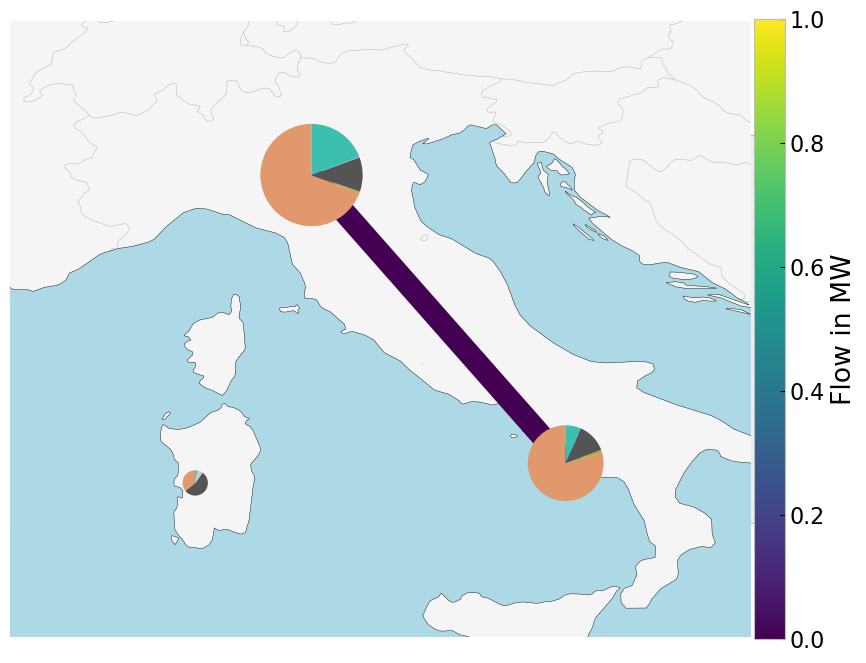

In [68]:
fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

collection = n.plot(
    bus_sizes=cap / 5e4,
    bus_colors = color_cap,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
        
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Generation Plot

In [69]:
#color list for energy generated 
tech_list_gen_table = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
colors_gen_table = []

for i in range(len(tech_list_gen_table)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen_table[i] == n.carriers.index[j]:
            colors_gen_table.append(n.carriers.color[j])
            break  # break the inner loop once a match is found 

#Adjust Load shedding's unit to MW from kW
#for column in n.generators_t.p.columns:
#    if column.endswith('load') and not column.endswith('H2 load'):
#        n.generators_t.p[column]/=1e3
        

gen = n.generators.assign(g=n.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_13740\971004373.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen_table.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


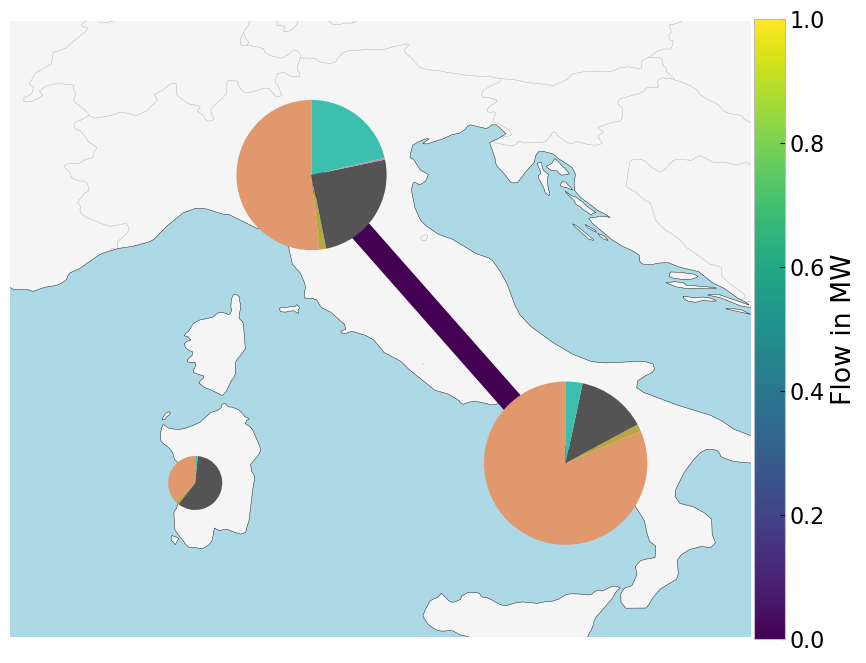

In [70]:
carriers = n.generators.carrier.unique()

plt.figure(figsize =(10,10))

collection = n.plot(
    bus_sizes=gen / 1e4,
    bus_colors = colors_gen_table,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

<Figure size 640x480 with 0 Axes>

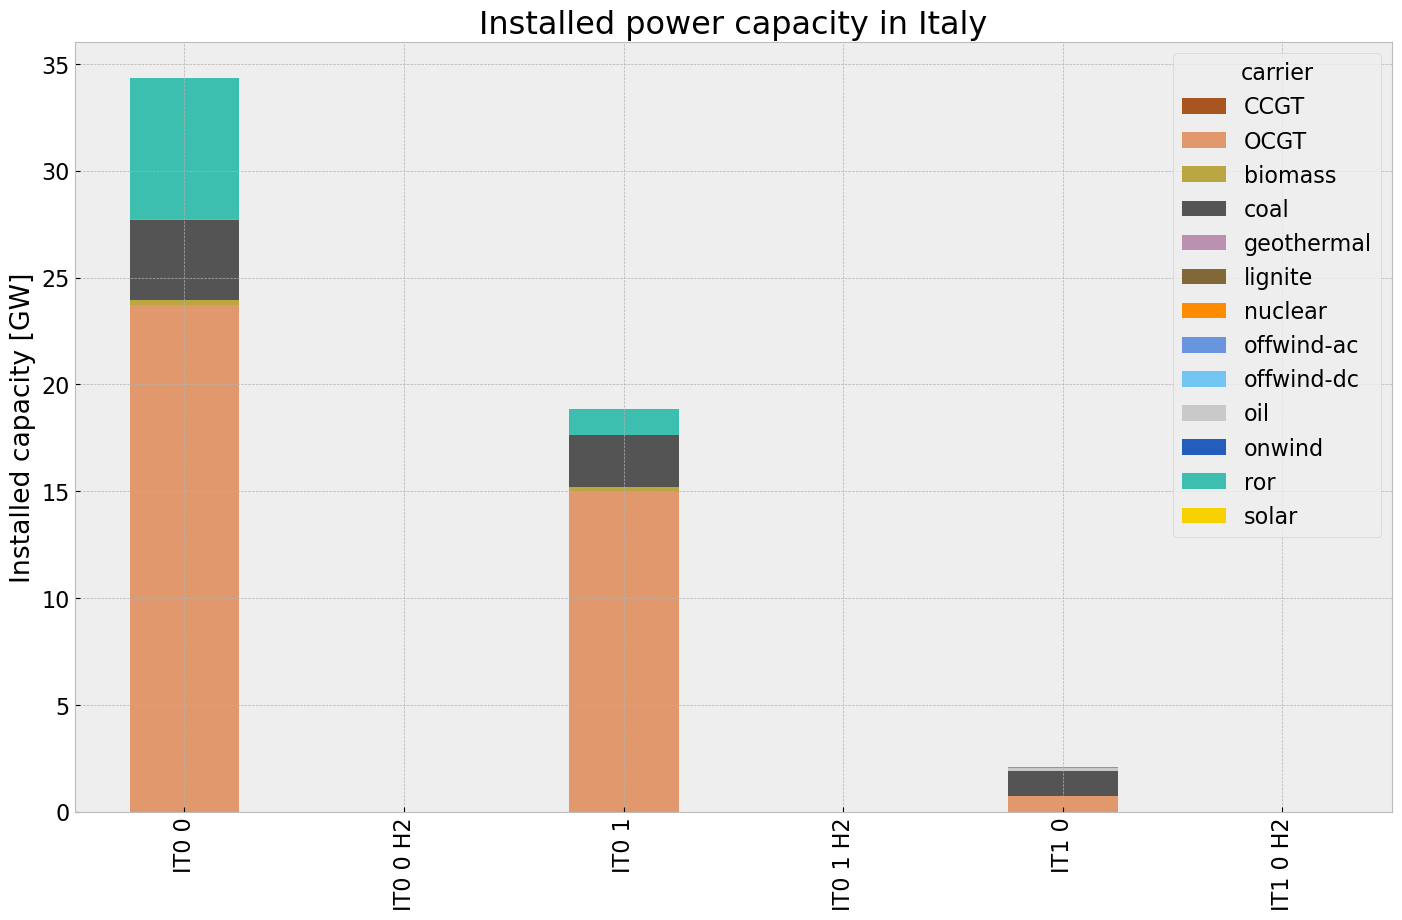

<Figure size 640x480 with 0 Axes>

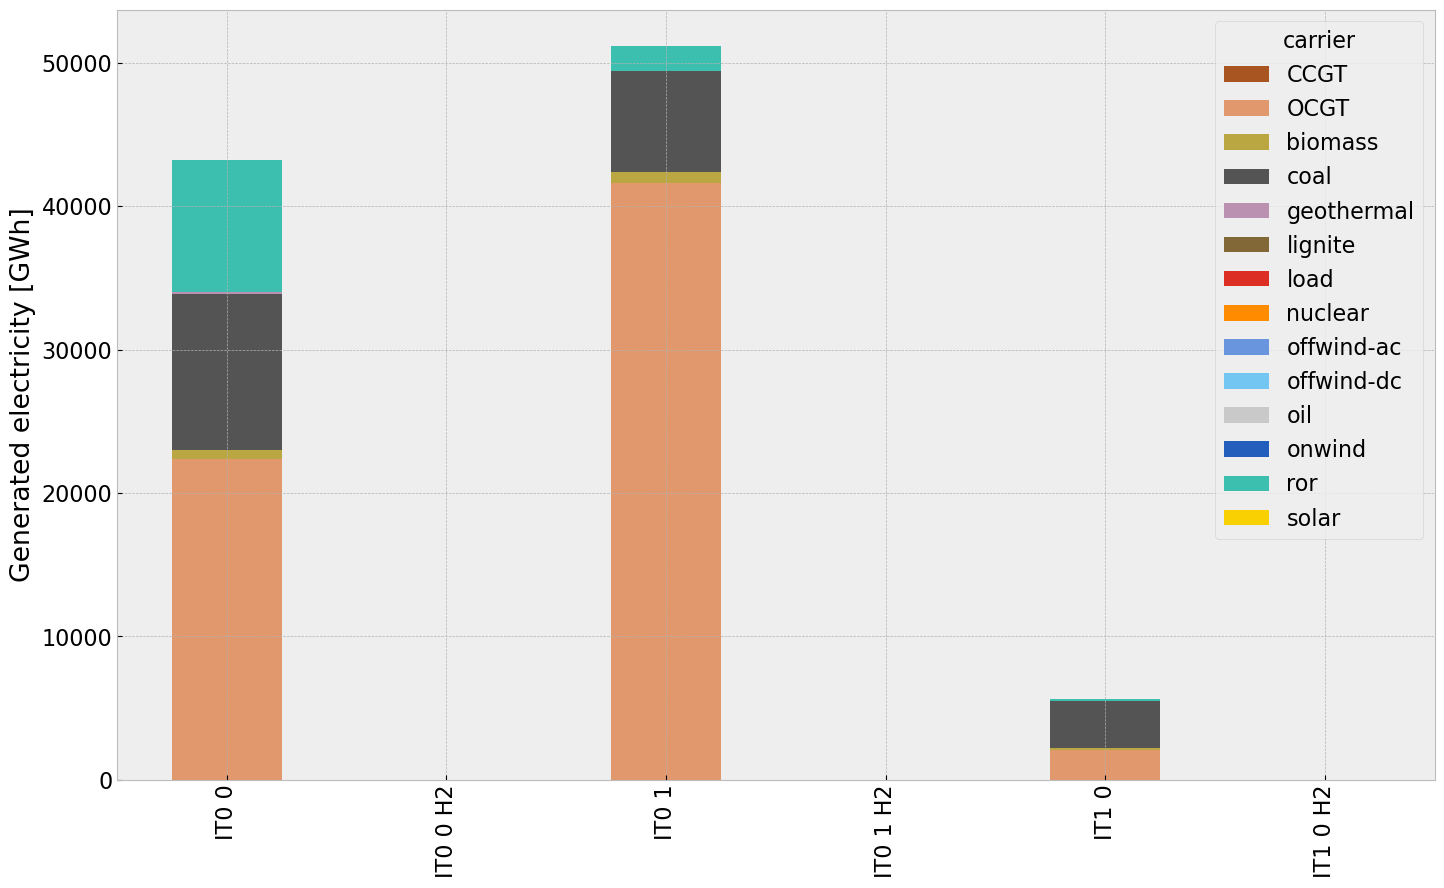

In [71]:
capacities_base = inst_cap_table(n, color_cap)
gen_base = gen_power_table(n,colors_gen_table)